<h2 style='text-align:center; color:darkblue'><b> Navigating Demand: A Data-Driven Approach to NYC Taxi Fleet Optimization</b></h1>
<h5 style="text-align: center;">Irene Selena Mulyono JCDS 0410 - 005</h2>

<a id="numerical"></a>
# <b><span style='color:darkgreen'>Section 1 |</span><span style='color:darkblue'> Introduction</span></b>

____

<a id="basic"></a>
### <b><span style='color:darkblue'> Company Overview: NYC TLC</span></b>

The New York City Taxi and Limousine Commission (NYC TLC) is a pioneering regulatory agency dedicated to the safety and convenience of the city's transportation network. Founded in 1971, NYC TLC has a storied history of regulating and licensing the diverse fleet of vehicles that serve the city's transportation needs. 

NYC TLC oversees four main business revenue streams: Yellow Cabs, Green Cabs, For-Hire Vehicle Bases, and Paratransit Vehicles. Yellow Cabs, iconic to New York City, provide metered services throughout the city, catering to millions of residents and tourists annually. Green Cabs, introduced in 2013, extend taxi services to the outer boroughs and upper Manhattan, addressing the need for reliable transport in underserved areas. For-Hire Vehicle Bases include services such as black cars, luxury limousines, and ride-hailing platforms like Uber and Lyft, offering a variety of transportation options to meet diverse customer preferences. Paratransit Vehicles provide essential services to individuals with disabilities, ensuring accessible and equitable transport across the city. These services collectively enable NYC TLC to meet the varied transportation needs of New Yorkers while maintaining high standards of safety and service.


As the primary regulatory body for the city's diverse and extensive transportation network, NYC TLC holds a dominant position in the market. It regulates over 130,000 licensed vehicles, ensuring compliance with safety, operational, and customer service standards. Key competitors include emerging ride-hailing platforms and private transportation providers, yet NYC TLC's stringent regulatory framework and commitment to passenger safety position it as a leader in urban transportation governance. The commission's proactive approach to integrating new technologies and addressing evolving transportation needs has earned it a reputation for excellence and innovation in the transportation sector.

<a id="basic"></a>
### <b><span style='color:darkblue'> Business Context</span></b>


The urban transportation sector in New York City, with an annual market size exceeding $10 billion, is rapidly evolving. Serving a population of over 8 million residents and millions of visitors each year, NYC TLC's revenue is influenced by the rise of ride-hailing services, increased demand for eco-friendly transport, and technological advancements in mobility. Competitors like Uber and Lyft pose challenges, but NYC TLC's focus on regulatory innovation and strategic partnerships aims to optimize revenue streams from yellow cabs, green cabs, for-hire vehicles, and paratransit services. By adapting to these trends, NYC TLC ensures sustainable revenue growth and meets the diverse transportation needs of New Yorkers and visitors alike.


<a id="basic"></a>
### <b><span style='color:darkblue'> Business Task: Optimizing NYC TLC Vehicle Allocation to Maximize Revenue</span></b>

**Problem Statement:**
Despite a robust framework for managing a diverse fleet for a long period of time, NYC TLC still has an opportunity in increasing their revenue by 15% in the next quarter if they were to optimize their fleets according to the customer demand pattern. Given the evolving dynamics of urban transport and varying demand across different boroughs, zones, and times, there is a significant opportunity to enhance revenue by optimizing vehicle distribution. This analysis seeks to strategically align vehicle allocation with real-time supply and demand data to reduce idle times, increase service availability, increase customer satisfication, which thus will boost revenue.

**Key Questions:**
1. What is the revenue trend in the first quarter of 2023?
2. Which part of the business can be improved? and how to do so?
3. Which areas have the highest demand and how does this impact revenue?
4. What are the peak demand times for Green cabs, and how can vehicle allocation be adjusted accordingly?
5. Based on the demand pattern accross diferent times and places, which area should the NYC TLC focused on?

This analysis will utilize data from the first quarter of 2023, encompassing Green cabs operations data, including trip locations, times, and total fees amount. Focus will be primarily on NYC's five boroughs, namely : Manhattan, Queens, Bronx, Staten Island, and Brooklyn. The success of the analysis will be determined by the high-demand places and times and their impact on revenue, in which are hoping for a 15% increase in revenue in the next quarter

<a id="basic"></a>
### <b><span style='color:darkblue'> Scenario: Optimizing NYC TLC Vehicle Allocation to Maximize Revenue</span></b>

**The Key Stakeholders for this Analysis are:**

1. **Chief Financial Officer (CFO):**
   - **Role:** Manages the financial health of NYC TLC, including managing financial statements and financial planning.

2. **Director of Operations:**
   - **Role:** Manages day-to-day operations of the vehicle fleet, including scheduling and allocation.

3. **NYC TLC Green Cab Drivers:**
   - **Role:** Operates the vehicle, looks for street-hail passengers.

We assume that the available Q1 trip data is accurate and comprehensive, reflecting true demand patterns for green taxis in NYC. Additionally, we assume that external factors influencing demand pattern, such as economic conditions and competitor activities, remain relatively stable during the analysis period.

<a id="numerical"></a>
# <b><span style='color:darkgreen'>Section 2 |</span><span style='color:darkblue'> Data Examination</span></b>

____

Once you have acquired your data – whether this is all of it or just a starting point – the second step is to examine it thoroughly. Before you choose what meal to cook, you need to know what ingredients you have, how much and in what condition. The same applies to data. Before you can contemplate any design thinking you first need to familiarise yourself fully with the physical characteristics and state of your data. Examining your data specifically involves learning about the **the size and range of values held, and its condition.**

## Data Size : Amount and Range

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn

In [39]:
# Import csv file
trips1 = pd.read_csv('data/NYC TLC Trip Record.csv')

In [40]:
trips1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

This data represents NYC TLC's Green Cab trip reports during the month of January in 2023. It consists of 68,211 rows with 20 different columns

In [41]:
trips1['passenger_count'].value_counts().sort_index()

passenger_count
0.0      336
1.0    54299
2.0     5096
3.0      958
4.0      364
5.0     1772
6.0     1054
7.0        4
8.0        2
9.0        2
Name: count, dtype: int64

This is the frequency distribution for `passenger_count` column which has some anomality as the passenger count for a green cab is from 1 to 6 passengers only.

In [42]:
trips1.payment_type.replace({
    1.0: "Credit Card",
    2.0: "Cash",
    3.0: "No Charge",
    4.0: "Dispute",
    5.0: "Unknown",
    6.0: "Voided Trip"
}).value_counts()

payment_type
Credit Card    40686
Cash           22632
No Charge        472
Dispute           95
Unknown            2
Name: count, dtype: int64

This is the frequency distribution for `payment_type` column.

"No Charge" payment type refers to situations where the ride is free of charge that could be caused by company promotions, special events, or payment issues.

"Dispute" payment type refers to situations where the passengers disputed the charge and the company will review the trip record for further actions. This could be triggered by the following issues: diagreement on fare, service complaints, meter issues, and/or overcharging

In [43]:
trips1.trip_type.replace({
    1.0 : "Street-hail",
    2.0 : "Dispatch"
}).value_counts()

trip_type
Street-hail    62476
Dispatch        1401
Name: count, dtype: int64

This is the frequency distribution for `trip_type` column where the vast majority of trips in January of 2023 were street-hailed rather than dispatched.

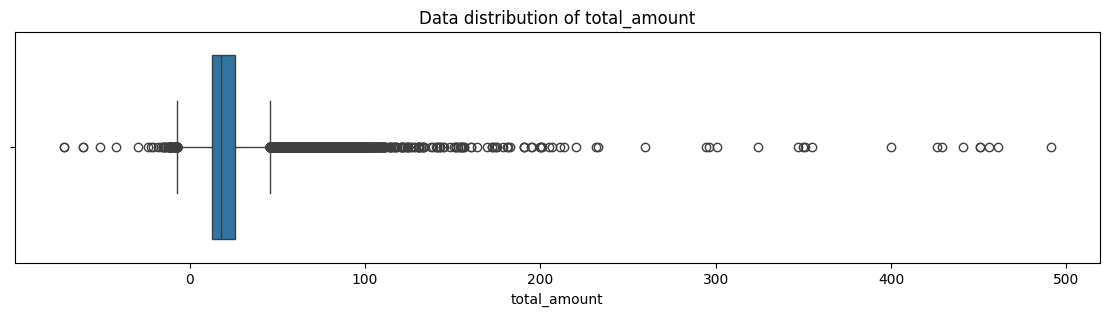

In [44]:
plt.figure(figsize=(14, 3))         # ukuran figure/kanvas
sns.boxplot(data=trips1, x='total_amount')    # boxplot
plt.title('Data distribution of total_amount')      # title
plt.show()

`total_amount` column represents the total amount that the passenger(s) paid and it do not have a normal data distribution

### Data Condition : Quality

In [45]:
len(trips1[trips1['passenger_count'].isnull()]['passenger_count'])

4324

The `passenger_count` column has 4324 column which are all related to `payment_type` and `trip_type` columns

In [46]:
len(trips1[trips1['payment_type'].isnull()])

4324

In [47]:
len(trips1[trips1['trip_type'].isnull()])

4334

In [48]:
trips1[trips1['payment_type'].isnull() & trips1['passenger_count'].isnull() & trips1['trip_type'].isnull()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,NaN,NaN,7,17,NaN,9.33,36.03,0.0,0.0,7.41,0.0,NaN,1.0,44.44,NaN,NaN,NaN
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,NaN,NaN,37,37,NaN,2.67,14.55,0.0,0.0,3.11,0.0,NaN,1.0,18.66,NaN,NaN,NaN
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,NaN,NaN,80,7,NaN,7.39,32.13,0.0,0.0,6.63,0.0,NaN,1.0,39.76,NaN,NaN,NaN
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,NaN,NaN,169,42,NaN,4.04,17.85,0.0,0.0,0.00,0.0,NaN,1.0,18.85,NaN,NaN,NaN
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,NaN,NaN,42,262,NaN,3.86,19.67,0.0,0.0,4.68,0.0,NaN,1.0,28.10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


All `payment_type` and `passenger_count` columns that have null values will also have null values in the `trip_type` column. But there are 10 null entries in `trip_type` column that do not have null values in `payment_type` nor `passenger_count` columns

In [49]:
trips1[trips1['payment_type'].notnull() & trips1['passenger_count'].notnull() & trips1['trip_type'].isnull()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.3,18.2,0.0,1.5,0.0,0.0,NaN,1.0,19.7,1.0,NaN,0.0
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.7,23.5,0.0,1.5,0.0,0.0,NaN,1.0,25.0,1.0,NaN,0.0
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.2,28.2,0.0,1.5,0.0,0.0,NaN,1.0,29.7,1.0,NaN,0.0
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.7,22.5,0.0,1.5,0.0,0.0,NaN,1.0,24.0,1.0,NaN,0.0
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.5,24.2,0.0,1.5,0.0,0.0,NaN,1.0,25.7,1.0,NaN,0.0
29711,1,2023-01-15 17:52:52,2023-01-15 22:11:55,N,99.0,150,123,1.0,1.6,15.2,0.0,1.5,0.0,0.0,NaN,1.0,16.7,1.0,NaN,0.0
35975,1,2023-01-19 01:07:59,2023-01-19 01:17:19,N,99.0,90,68,1.0,0.6,15.2,0.0,1.5,0.0,0.0,NaN,1.0,16.7,1.0,NaN,0.0
37691,1,2023-01-19 17:16:59,2023-01-19 22:29:53,N,99.0,265,123,1.0,14.6,40.2,0.0,1.5,0.0,0.0,NaN,1.0,41.7,1.0,NaN,0.0
42432,1,2023-01-21 20:29:58,2023-01-22 02:59:25,N,99.0,150,123,1.0,1.4,15.2,0.0,1.5,0.0,0.0,NaN,1.0,16.7,1.0,NaN,0.0
45204,1,2023-01-23 13:45:11,2023-01-23 23:36:42,N,99.0,244,248,1.0,28.3,50.2,0.0,1.5,0.0,0.0,NaN,1.0,51.7,1.0,NaN,0.0


<Axes: >

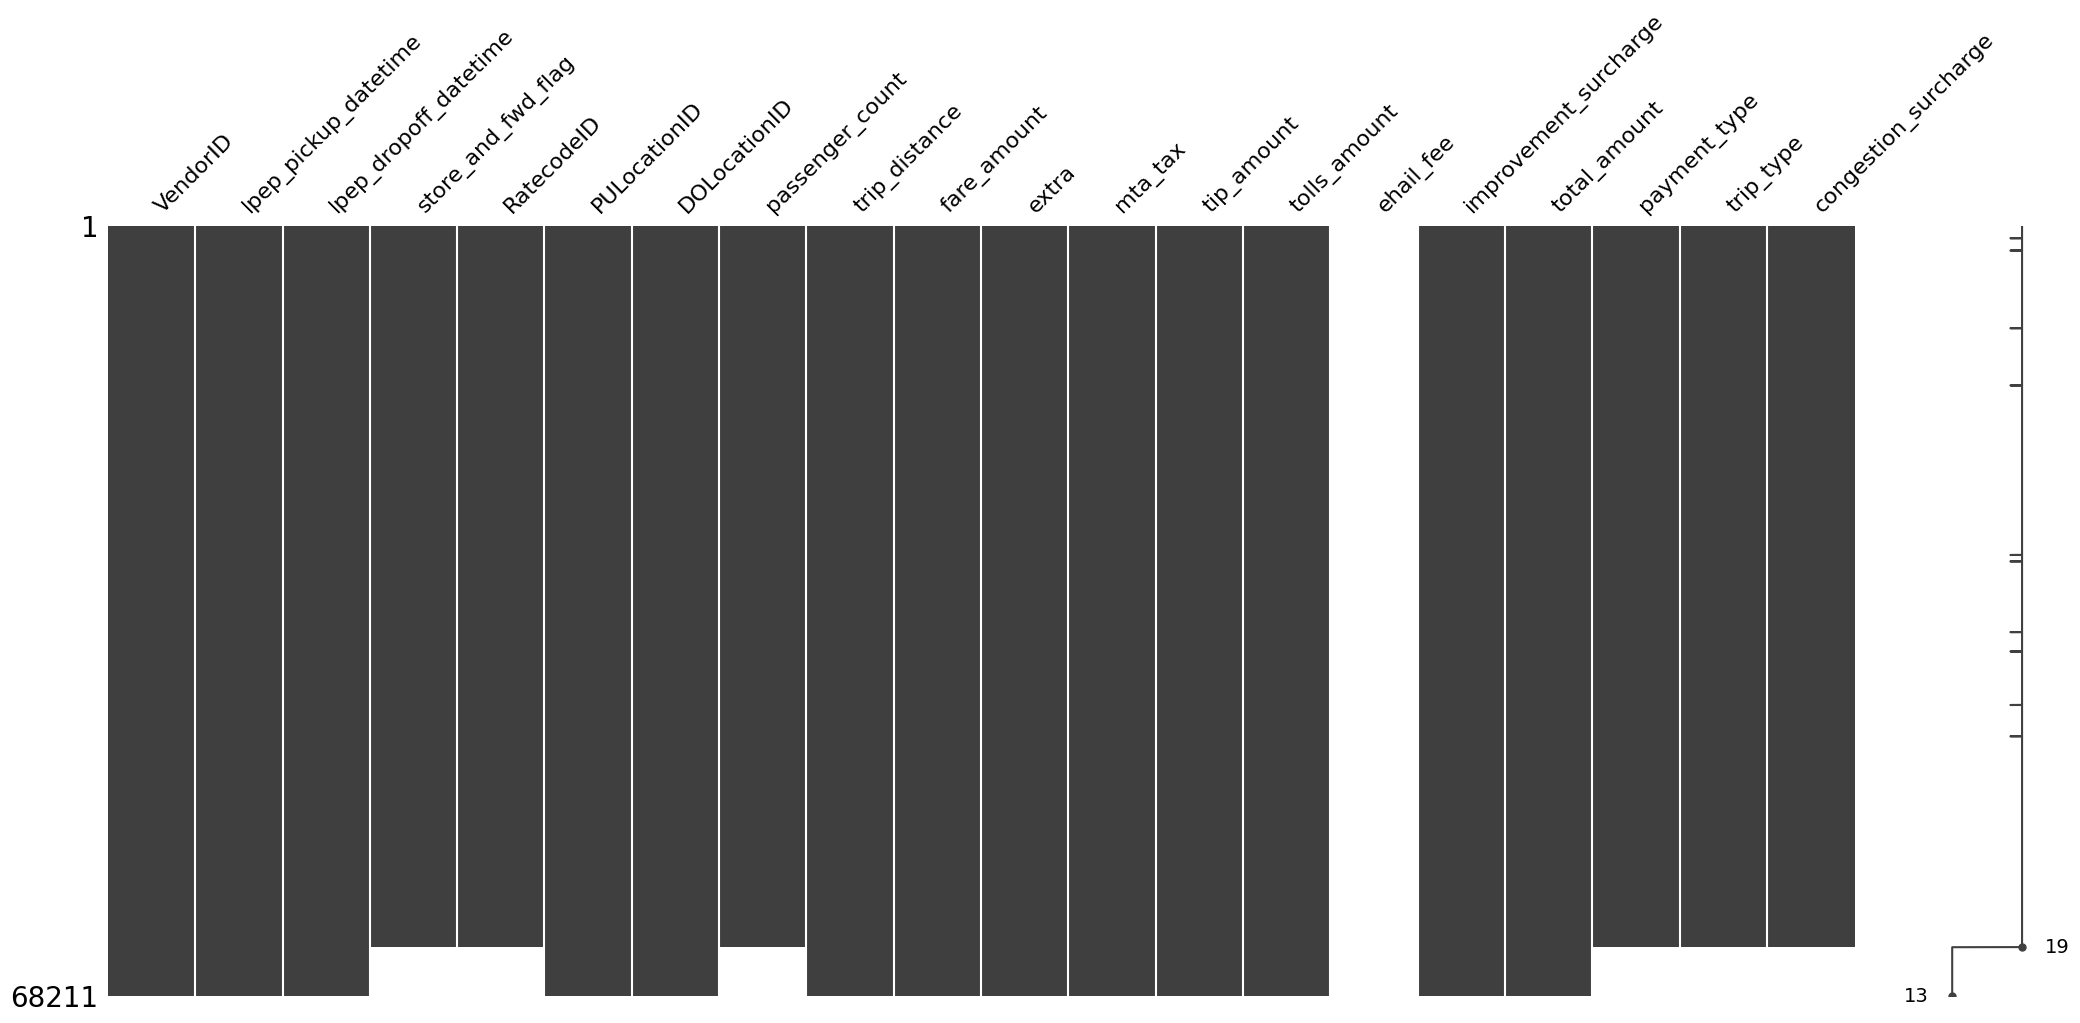

In [50]:
msn.matrix(trips1)

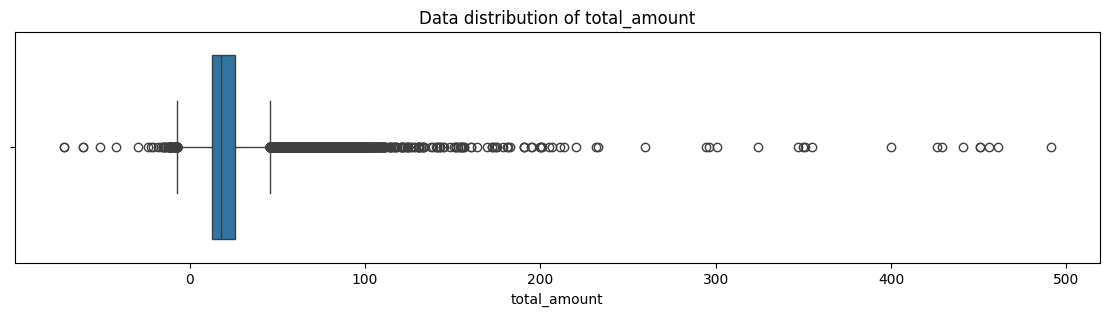

In [51]:
plt.figure(figsize=(14, 3))         # ukuran figure/kanvas
sns.boxplot(data=trips1, x='total_amount')    # boxplot
plt.title('Data distribution of total_amount')      # title
plt.show()

<Figure size 10000x4000 with 0 Axes>

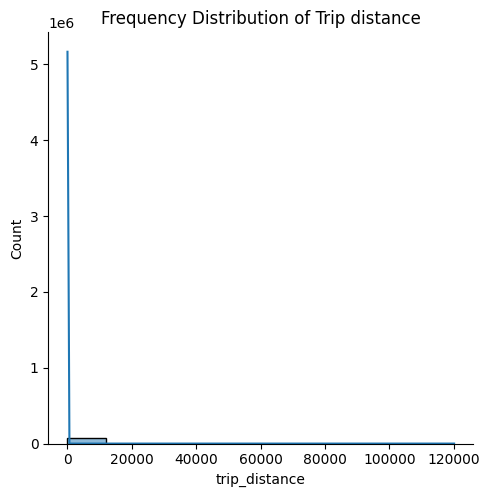

In [52]:
plt.figure(figsize=(100, 40))                                     # ukuran figure/kanvas
sns.displot(data=trips1, x='trip_distance', kde=True, bins=10)             # histogram
plt.title('Frequency Distribution of Trip distance', size=12)          # title
plt.show() 

In [53]:
trips1.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,68211.0,1.863028,0.343820,1.00,2.00,2.00,2.00,2.00
RatecodeID,63887.0,1.117160,1.372913,1.00,1.00,1.00,1.00,99.00
PULocationID,68211.0,98.549735,61.244314,1.00,74.00,75.00,129.00,265.00
DOLocationID,68211.0,138.429901,76.761311,1.00,74.00,138.00,219.00,265.00
passenger_count,63887.0,1.315870,0.979054,0.00,1.00,1.00,1.00,9.00
trip_distance,68211.0,8.114852,585.105955,0.00,1.11,1.85,3.21,120098.84
fare_amount,68211.0,16.603545,13.470121,-70.00,9.30,13.50,19.80,490.00
extra,68211.0,0.825431,1.269904,-2.50,0.00,0.00,1.00,12.50
mta_tax,68211.0,0.588340,0.385819,-0.50,0.50,0.50,0.50,2.75
tip_amount,68211.0,2.139012,3.052710,-10.50,0.00,1.60,3.33,222.22


This is the statistical summary of all variables, where there are anomalities in some columns:
- `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `total_amount`, and `congestion_surcharge` columns have negative values
- `passenger_count`, `trip_distance`, `fare_amount`, and `total_amount`columns have 0 values
- most of the columns also have extreme values

In [54]:
trips1_duplicates = trips1[trips1.duplicated()]
trips1_duplicates

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


There are no duplicates found in the dataset

## Data Condition : Representativeness

<a id="basic"></a>
### <b><span style='color:darkblue'> Representativeness</span></b>


From the data and information gathered above. This dataset alone (NYC TLC Green Cab January 2023 Trip Record) have not represent the data needed to help solve the problem statement and its objectives. There are also limitations in which the dataset does not give details regarding pickup and dropoff location id of the passengers. We would need to gather external data of February and March 2023 trips in order to be able to analyze the customers' demand patterns for green cabs trips on the first quarter of 2023, we would also be needing the specific borough and zones of the locationID given in the dataset.

<a id="numerical"></a>
# <b><span style='color:darkgreen'>Section 3 |</span><span style='color:darkblue'> Data Transformation</span></b>

____

## Analyzing Green Taxi Trips to Maximize Revenue

To maximize revenue from green taxi trips, it's essential to perform thorough data cleaning, transformation, and analysis. **Data cleaning** involves identifying and rectifying inaccuracies and inconsistencies in the raw data, such as handling missing values, correcting erroneous entries, and ensuring consistent formatting. This step is crucial to maintain the integrity of the analysis. **Data transformation** encompasses processes such as normalization, aggregation, and feature engineering, enabling the conversion of raw data into meaningful insights. For instance, calculating metrics like trip duration, distance, and average fare per trip can provide valuable indicators of performance. Finally, **data analysis** allows us to identify patterns and trends, such as peak demand times and high-revenue routes. By leveraging these insights, we can optimize taxi dispatch, adjust pricing strategies, and enhance service offerings, ultimately leading to increased revenue. Through meticulous data cleaning, transformation, and analysis, we can develop a comprehensive understanding of green taxi operations and implement data-driven strategies to achieve revenue maximization.

<a id="basic"></a>
### <b><span style='color:darkblue'> Data Consolidating : Append</span></b>

In order to analyze the green taxis trip trend in the first quarter of 2023, we will have to append data for February and March 2023 trip records that was gathered from the NYC TLC official government website. Download data here: [NYC TLC Trip Record Data page](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

In [55]:
trips2 = pq.read_table('data/green_tripdata_2023-02.parquet')
trips2 = trips2.to_pandas()
trips3 = pq.read_table('data/green_tripdata_2023-03.parquet')
trips3 = trips3.to_pandas()

In [56]:
trips2.head(3)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1,2023-02-01 00:46:22,2023-02-01 01:05:57,N,1.0,74,265,1.0,10.80,42.9,1.0,1.5,0.00,0.0,NaN,1.0,45.40,2.0,1.0,0.00
1,2,2023-02-01 00:05:09,2023-02-01 00:22:42,N,1.0,216,196,1.0,4.76,23.3,1.0,0.5,0.00,0.0,NaN,1.0,25.80,2.0,1.0,0.00
2,2,2023-02-01 00:03:47,2023-02-01 00:27:30,N,1.0,7,114,1.0,6.32,30.3,1.0,0.5,8.89,0.0,NaN,1.0,44.44,1.0,1.0,2.75


In [57]:
trips3.head(3)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-03-01 00:25:10,2023-03-01 00:35:47,N,1.0,82,196,1.0,2.36,13.5,1.0,0.5,0.0,0.0,NaN,1.0,16.0,2.0,1.0,0.0
1,2,2023-03-01 00:14:29,2023-03-01 00:25:04,N,1.0,7,7,1.0,0.78,-6.5,-1.0,-0.5,0.0,0.0,NaN,-1.0,-9.0,3.0,1.0,0.0
2,2,2023-03-01 00:14:29,2023-03-01 00:25:04,N,1.0,7,7,1.0,0.78,6.5,1.0,0.5,0.0,0.0,NaN,1.0,9.0,3.0,1.0,0.0


In [58]:
# Concating all 3 datasets

df = pd.concat([trips1, trips2, trips3], axis=0)

In [59]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.00,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.00,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.00,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.00,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.00,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72039,2,2023-03-31 23:33:00,2023-03-31 23:45:00,None,NaN,25,144,NaN,2.93,16.46,0.0,0.0,4.04,0.00,NaN,1.0,24.25,NaN,NaN,NaN
72040,2,2023-03-31 23:27:00,2023-03-31 23:53:00,None,NaN,36,236,NaN,8.49,34.66,0.0,0.0,7.68,0.00,NaN,1.0,46.09,NaN,NaN,NaN
72041,2,2023-03-31 23:09:00,2023-03-31 23:40:00,None,NaN,42,225,NaN,12.27,41.79,0.0,0.0,7.40,6.55,NaN,1.0,56.74,NaN,NaN,NaN
72042,2,2023-03-31 23:39:00,2023-04-01 00:01:00,None,NaN,80,189,NaN,4.42,17.82,0.0,0.0,1.94,0.00,NaN,1.0,20.76,NaN,NaN,NaN


<a id="basic"></a>
### <b><span style='color:darkblue'> Dropping Unwanted Columns</span></b>

Now, we are going to drop some unwanted columns that will not help us in addressing the problem statement. These columns are namely: `VendorID`, `store_and_fwd_flag`, `ehail_fee` as they are irrelevant to the problem statement.

In [60]:
# Drop unwanted column(s)
df = df.drop(columns=['VendorID',
                      'store_and_fwd_flag', 
                      'ehail_fee'], axis = 1)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205064 entries, 0 to 72043
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   lpep_pickup_datetime   205064 non-null  object 
 1   lpep_dropoff_datetime  205064 non-null  object 
 2   RatecodeID             191382 non-null  float64
 3   PULocationID           205064 non-null  int64  
 4   DOLocationID           205064 non-null  int64  
 5   passenger_count        191382 non-null  float64
 6   trip_distance          205064 non-null  float64
 7   fare_amount            205064 non-null  float64
 8   extra                  205064 non-null  float64
 9   mta_tax                205064 non-null  float64
 10  tip_amount             205064 non-null  float64
 11  tolls_amount           205064 non-null  float64
 12  improvement_surcharge  205064 non-null  float64
 13  total_amount           205064 non-null  float64
 14  payment_type           191382 non-null  fl

<a id="basic"></a>
### <b><span style='color:darkblue'> Handling Missing Values</span></b>

Calculating the percentage of missing data in the dataset

In [62]:
missingData = (df.isna().mean() * 100).to_frame().rename(columns={'index':'columns', 0:'percent'})
missingData['count'] = df.isna().sum()
missingData['percent'] = round(missingData['percent'], 2).astype('str') + '%'
missingData = missingData.reset_index(names='column')
missingData

,column,percent,count
0,lpep_pickup_datetime,0.0%,0
1,lpep_dropoff_datetime,0.0%,0
2,RatecodeID,6.67%,13682
3,PULocationID,0.0%,0
4,DOLocationID,0.0%,0
5,passenger_count,6.67%,13682
6,trip_distance,0.0%,0
7,fare_amount,0.0%,0
8,extra,0.0%,0
9,mta_tax,0.0%,0


In [63]:
df['RatecodeID'] = df['RatecodeID'].fillna(value=99) # Fill missing values with code '99' which means unknown ratecode
df['passenger_count'] = df['passenger_count'].fillna(value=1) # Fill with '1' assuming that only 1 passenger was in that ride
df['payment_type'] = df['payment_type'].fillna(df['payment_type'].mode()[0]) # Fill NaN values with mode 
df['trip_type'] = df['trip_type'].fillna(df['trip_type'].mode()[0]) # Fill Nan values with mode
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(value=0) # Fill with '0' as a default, but will alter it again later according to the routes taken by the passenger(s)

In [64]:
missingData = (df.isna().mean() * 100).to_frame().rename(columns={'index':'columns', 0:'percent'})
missingData['count'] = df.isna().sum()
missingData['percent'] = round(missingData['percent'], 2).astype('str') + '%'
missingData = missingData.reset_index(names='column')
missingData

,column,percent,count
0,lpep_pickup_datetime,0.0%,0
1,lpep_dropoff_datetime,0.0%,0
2,RatecodeID,0.0%,0
3,PULocationID,0.0%,0
4,DOLocationID,0.0%,0
5,passenger_count,0.0%,0
6,trip_distance,0.0%,0
7,fare_amount,0.0%,0
8,extra,0.0%,0
9,mta_tax,0.0%,0


<a id="basic"></a>
### <b><span style='color:darkblue'> Data Consolidating : Extend</span></b>

Now that we have handled all the missing values, we can now proceed to extend our data by merging external csv. file from the official NYC TLC website which tells us the specific borough and zone location of the pickup and dropoff id in the original dataset.

In [65]:
# Importing Boroughs and Zone according to its locationID
location = pd.read_csv('data/taxi_zone_lookup.csv')
location['Borough'] = np.where(
    (location['LocationID'] == 265) & (location['Borough'].isna()),
    'Outside of NYC',
    location['Borough']
)
location['Zone'] = np.where(
    (location['LocationID'] == 264) & (location['Zone'].isna()),
    'Outside of NYC',
    location['Zone']
)
location.head(5)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [66]:
# Create separate df from PU location as well as DO location and rename its respective columns

PULocation = location[['LocationID','Borough', 'Zone']].copy()
PULocation.rename(columns={'LocationID': 'PULocationID', 
                           'Borough': 'PU_Borough', 
                           'Zone': 'PU_Zone'}, inplace=True)

DOLocation = location[['LocationID','Borough', 'Zone']].copy()
DOLocation.rename(columns={'LocationID': 'DOLocationID', 
                           'Borough': 'DO_Borough', 
                           'Zone': 'DO_Zone'}, inplace=True)
DOLocation

,DOLocationID,DO_Borough,DO_Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights
...,...,...,...
260,261,Manhattan,World Trade Center
261,262,Manhattan,Yorkville East
262,263,Manhattan,Yorkville West
263,264,Unknown,Outside of NYC


There are five main Boroughs in New York City, namely: Queens, Manhattan, Brooklyn, Bronx, and Staten Island. The EWR in this csv file indicates trips going to NEWARK airport, and there is also an unknown category

In [67]:
location['Borough'].value_counts()

Borough
Queens            69
Manhattan         69
Brooklyn          61
Bronx             43
Staten Island     20
EWR                1
Unknown            1
Outside of NYC     1
Name: count, dtype: int64

In [68]:
# merging the PULocation and DOLocation data into the main dataset

# Merge the datasets
trips = pd.merge(df, PULocation,on='PULocationID', how='left')
trips = pd.merge(trips, DOLocation,on='DOLocationID', how='left')

<a id="basic"></a>
### <b><span style='color:darkblue'> Further Data Cleaning & Handling Anomalities</span></b>

In [69]:
## Fixing Data Types
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205064 entries, 0 to 205063
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   lpep_pickup_datetime   205064 non-null  object 
 1   lpep_dropoff_datetime  205064 non-null  object 
 2   RatecodeID             205064 non-null  float64
 3   PULocationID           205064 non-null  int64  
 4   DOLocationID           205064 non-null  int64  
 5   passenger_count        205064 non-null  float64
 6   trip_distance          205064 non-null  float64
 7   fare_amount            205064 non-null  float64
 8   extra                  205064 non-null  float64
 9   mta_tax                205064 non-null  float64
 10  tip_amount             205064 non-null  float64
 11  tolls_amount           205064 non-null  float64
 12  improvement_surcharge  205064 non-null  float64
 13  total_amount           205064 non-null  float64
 14  payment_type           205064 non-nu

Fixing datatypes for `lpep_pickup_datetime`, `lpep_dropoff_datetime`,`RatecodeID`, `passenger_count`, `payment_type`, `trip_type` columns into their respective data types

In [70]:
# Fixing datatypes
trips['lpep_pickup_datetime'] = pd.to_datetime(trips['lpep_pickup_datetime'])
trips['lpep_dropoff_datetime'] = pd.to_datetime(trips['lpep_dropoff_datetime'])
trips['RatecodeID'] = trips['RatecodeID'].astype(int)
trips['passenger_count'] = trips['passenger_count'].astype(int)
trips['payment_type'] = trips['payment_type'].astype(int)
trips['trip_type'] = trips['trip_type'].astype(int)

In [71]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205064 entries, 0 to 205063
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   lpep_pickup_datetime   205064 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  205064 non-null  datetime64[ns]
 2   RatecodeID             205064 non-null  int64         
 3   PULocationID           205064 non-null  int64         
 4   DOLocationID           205064 non-null  int64         
 5   passenger_count        205064 non-null  int64         
 6   trip_distance          205064 non-null  float64       
 7   fare_amount            205064 non-null  float64       
 8   extra                  205064 non-null  float64       
 9   mta_tax                205064 non-null  float64       
 10  tip_amount             205064 non-null  float64       
 11  tolls_amount           205064 non-null  float64       
 12  improvement_surcharge  205064 non-null  floa

In [72]:
trips.head(3)

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PU_Borough,PU_Zone,DO_Borough,DO_Zone
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1,166,143,1,2.58,14.9,1.0,0.5,...,0.0,1.0,24.18,1,1,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2023-01-01 00:51:03,2023-01-01 00:57:49,1,24,43,1,1.81,10.7,1.0,0.5,...,0.0,1.0,15.84,1,1,0.00,Manhattan,Bloomingdale,Manhattan,Central Park
2,2023-01-01 00:35:12,2023-01-01 00:41:32,1,223,179,1,0.00,7.2,1.0,0.5,...,0.0,1.0,11.64,1,1,0.00,Queens,Steinway,Queens,Old Astoria


Now that we have that taken care of, we are going to re-arrange the columns order to make it easier to analyze

In [73]:
trips = trips.iloc[:,[0,1,3,17,18,4,19,20,5,2,15,6,7,8,9,10,11,12,16,13,14]]
trips.head(3)

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,PU_Borough,PU_Zone,DOLocationID,DO_Borough,DO_Zone,passenger_count,RatecodeID,...,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,payment_type
0,2023-01-01 00:26:10,2023-01-01 00:37:11,166,Manhattan,Morningside Heights,143,Manhattan,Lincoln Square West,1,1,...,2.58,14.9,1.0,0.5,4.03,0.0,1.0,2.75,24.18,1
1,2023-01-01 00:51:03,2023-01-01 00:57:49,24,Manhattan,Bloomingdale,43,Manhattan,Central Park,1,1,...,1.81,10.7,1.0,0.5,2.64,0.0,1.0,0.00,15.84,1
2,2023-01-01 00:35:12,2023-01-01 00:41:32,223,Queens,Steinway,179,Queens,Old Astoria,1,1,...,0.00,7.2,1.0,0.5,1.94,0.0,1.0,0.00,11.64,1


## Handling Error/Outliers Values

In [74]:
# Filtering trips outside Q1 of 2023
trips = trips.loc[trips['lpep_pickup_datetime'].dt.year>=2023]
trips = trips.loc[trips['lpep_pickup_datetime'].dt.month<=3]
trips['lpep_pickup_datetime'].sort_values()

24       2023-01-01 00:01:31
44       2023-01-01 00:04:25
57       2023-01-01 00:06:48
41       2023-01-01 00:08:05
11       2023-01-01 00:08:43
                 ...        
200488   2023-03-31 23:55:09
200487   2023-03-31 23:55:09
200503   2023-03-31 23:55:27
200486   2023-03-31 23:56:34
200498   2023-03-31 23:59:47
Name: lpep_pickup_datetime, Length: 205059, dtype: datetime64[ns]

In [75]:
trips.columns

Index(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID',
       'PU_Borough', 'PU_Zone', 'DOLocationID', 'DO_Borough', 'DO_Zone',
       'passenger_count', 'RatecodeID', 'trip_type', 'trip_distance',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'congestion_surcharge', 'total_amount',
       'payment_type'],
      dtype='object')

In [76]:
trips.head(3)

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,PU_Borough,PU_Zone,DOLocationID,DO_Borough,DO_Zone,passenger_count,RatecodeID,...,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,payment_type
0,2023-01-01 00:26:10,2023-01-01 00:37:11,166,Manhattan,Morningside Heights,143,Manhattan,Lincoln Square West,1,1,...,2.58,14.9,1.0,0.5,4.03,0.0,1.0,2.75,24.18,1
1,2023-01-01 00:51:03,2023-01-01 00:57:49,24,Manhattan,Bloomingdale,43,Manhattan,Central Park,1,1,...,1.81,10.7,1.0,0.5,2.64,0.0,1.0,0.00,15.84,1
2,2023-01-01 00:35:12,2023-01-01 00:41:32,223,Queens,Steinway,179,Queens,Old Astoria,1,1,...,0.00,7.2,1.0,0.5,1.94,0.0,1.0,0.00,11.64,1


We will start by addressing those columns that have a fixed amount value and also those columns which only need a minor handling

In [77]:
# fixing `extra` column values
trips['extra'] = np.where(trips['extra']< 0, trips['extra']*-1, trips['extra'])

# Fixing `tip_amount` column values
trips['tip_amount'] = np.where(trips['tip_amount']< 0, trips['tip_amount'] * -1, trips['tip_amount'])

# Fixing `tolls_amount` column values
trips['tolls_amount'] = np.where(trips['tolls_amount']< 0, trips['tolls_amount'] * -1, trips['tolls_amount'])

# Fixing `fare_amount` column values
trips['fare_amount'] = np.where(trips['fare_amount']< 0, trips['fare_amount'] * -1, trips['fare_amount'])

# Fixing `improvement_surcharge` column values
# According to the NYC TLC website, the improvement surcharge for all green taxi rides are $1.00 so we will replace all value with 1.0
trips['improvement_surcharge'] = np.where(trips['improvement_surcharge']!= 1, 1, trips['improvement_surcharge'])

# Fixing `mta_tax` column values since mta tax is supposed to be a fixed amount
trips['mta_tax'] = np.where(trips['mta_tax']!= 0.5, 0.5, trips['mta_tax'])

# Fixing `congestion_surcharge` column values as it only applies to those trips which either starts or ends in Manhattan. 
# The surcharge amount is a fixed amount of $2.75
trips['congestion_surcharge'] = np.where(((trips['PU_Borough']=='Manhattan') | (trips['DO_Borough']=='Manhattan')), 2.75, 0)

there is anomalities in passenger count data as NYC's green cabs can only carry 1 to 6 passengers. Hence, we are going to fix this data anomalities

In [78]:
trips['passenger_count'].value_counts().sort_index()

passenger_count
0      1166
1    176832
2     15449
3      2768
4       937
5      4972
6      2916
7         8
8         6
9         5
Name: count, dtype: int64

In [79]:
trips.loc[(trips['passenger_count']<=0) | (trips['passenger_count']>6)]

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,PU_Borough,PU_Zone,DOLocationID,DO_Borough,DO_Zone,passenger_count,RatecodeID,...,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,payment_type
99,2023-01-01 01:27:36,2023-01-01 01:27:43,168,Bronx,Mott Haven/Port Morris,168,Bronx,Mott Haven/Port Morris,0,5,...,0.0,20.0,0.00,0.5,0.0,0.0,1.0,0.00,21.00,1
254,2023-01-01 04:21:35,2023-01-01 04:30:00,129,Queens,Jackson Heights,129,Queens,Jackson Heights,0,1,...,1.3,8.0,0.50,0.5,2.8,4.0,1.0,0.00,16.80,1
446,2023-01-01 11:42:13,2023-01-01 11:49:21,260,Queens,Woodside,260,Queens,Woodside,0,1,...,1.2,8.6,0.00,0.5,2.0,0.0,1.0,0.00,12.10,1
486,2023-01-01 12:11:05,2023-01-01 12:20:45,42,Manhattan,Central Harlem North,127,Manhattan,Inwood,0,1,...,3.4,16.3,0.00,0.5,1.0,0.0,1.0,2.75,18.80,1
487,2023-01-01 12:56:11,2023-01-01 13:01:06,75,Manhattan,East Harlem South,236,Manhattan,Upper East Side North,0,1,...,1.2,7.2,2.75,0.5,3.4,0.0,1.0,2.75,14.85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200169,2023-03-31 20:11:19,2023-03-31 20:27:47,74,Manhattan,East Harlem North,244,Manhattan,Washington Heights South,0,1,...,3.3,18.4,1.00,0.5,0.0,0.0,1.0,2.75,20.90,2
200266,2023-03-31 20:02:35,2023-03-31 20:09:57,41,Manhattan,Central Harlem,74,Manhattan,East Harlem North,0,1,...,1.2,7.2,1.00,0.5,1.9,0.0,1.0,2.75,11.60,1
200267,2023-03-31 20:28:41,2023-03-31 20:45:10,74,Manhattan,East Harlem North,238,Manhattan,Upper West Side North,0,1,...,4.2,18.4,3.75,0.5,0.0,0.0,1.0,2.75,23.65,2
200298,2023-03-31 21:26:02,2023-03-31 21:37:27,260,Queens,Woodside,157,Queens,Maspeth,0,1,...,2.1,12.1,1.00,0.5,0.0,0.0,1.0,0.00,14.60,2


In [80]:
trips['passenger_count'] = np.where(
    trips['passenger_count']<=0, 1, np.where(
        trips['passenger_count']>6, 6, trips['passenger_count']
    )
)

In [81]:
trips['passenger_count'].value_counts().sort_index()

passenger_count
1    177998
2     15449
3      2768
4       937
5      4972
6      2935
Name: count, dtype: int64

Now we are going to tackle the `RatecodeID` column

In [82]:
trips.RatecodeID.replace({
    1.0: "Standared rate",
    2.0: "JFK",
    3.0: "Newark",
    4.0: "Nassau or Westchester",
    5.0: "Negotiated Fare",
    6.0: "Group ride",
    99.0: "Unknown"
}).value_counts()

RatecodeID
Standared rate           185030
Unknown                   13704
Negotiated Fare            5525
JFK                         520
Nassau or Westchester       172
Newark                      107
Group ride                    1
Name: count, dtype: int64

Those rides labled with RatecodeID = 2.0 which is a ride from or to JFK airport, will have a flat fare amount of $70.0. Hence, we are going to fix the anomality in the data.

In [83]:
trips.loc[(trips['RatecodeID']==2) & (trips['fare_amount']!= 70)][['RatecodeID','fare_amount','total_amount']]

,RatecodeID,fare_amount,total_amount
12463,2,52.0,52.80
28681,2,52.0,59.35
50031,2,52.0,52.80
70818,2,52.0,56.25
72646,2,52.0,77.22
138633,2,52.0,59.35
146239,2,52.0,52.80
151524,2,52.0,60.05
154682,2,52.0,74.35
199028,2,52.0,69.35


In [84]:
trips['fare_amount'] = np.where(((trips['RatecodeID']==2) & (trips['fare_amount']!= 70)), 70, trips['fare_amount'])

In [85]:
trips.loc[(trips['RatecodeID']==2) & (trips['fare_amount']!= 70)][['RatecodeID','fare_amount','total_amount']]

,RatecodeID,fare_amount,total_amount


Next, we are going to fix anomalities in the `trip_distance` column

first we are going to drop the rows of data which have zero values in both trip distance and also fare amount since we can't really fill in the zero values accurately.

In [86]:
trips.loc[(trips['trip_distance']==0) & (trips['fare_amount']==0)]

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,PU_Borough,PU_Zone,DOLocationID,DO_Borough,DO_Zone,passenger_count,RatecodeID,...,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,payment_type
1581,2023-01-02 10:29:51,2023-01-02 10:30:34,264,Unknown,Outside of NYC,264,Unknown,Outside of NYC,1,1,...,0.0,0.0,0.0,0.5,0.0,0.0,1.0,0.00,0.0,1
2130,2023-01-02 15:46:00,2023-01-03 15:45:15,193,Queens,Queensbridge/Ravenswood,193,Queens,Queensbridge/Ravenswood,1,1,...,0.0,0.0,0.0,0.5,0.0,0.0,1.0,0.00,0.0,1
2793,2023-01-03 03:50:19,2023-01-03 03:50:19,129,Queens,Jackson Heights,264,Unknown,Outside of NYC,3,5,...,0.0,0.0,0.0,0.5,0.0,0.0,1.0,0.00,0.0,2
3557,2023-01-03 12:39:11,2023-01-03 12:39:19,264,Unknown,Outside of NYC,264,Unknown,Outside of NYC,1,1,...,0.0,0.0,0.0,0.5,0.0,0.0,1.0,0.00,0.0,1
3674,2023-01-03 13:28:25,2023-01-03 13:28:30,193,Queens,Queensbridge/Ravenswood,193,Queens,Queensbridge/Ravenswood,1,1,...,0.0,0.0,0.0,0.5,0.0,0.0,1.0,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188083,2023-03-26 06:51:54,2023-03-26 06:52:07,82,Queens,Elmhurst,82,Queens,Elmhurst,1,5,...,0.0,0.0,0.0,0.5,0.0,0.0,1.0,0.00,0.0,3
190694,2023-03-27 16:01:03,2023-03-27 16:06:52,152,Manhattan,Manhattanville,41,Manhattan,Central Harlem,1,1,...,0.0,0.0,0.0,0.5,0.0,0.0,1.0,2.75,0.0,1
191540,2023-03-27 21:54:01,2023-03-27 21:54:10,7,Queens,Astoria,7,Queens,Astoria,1,1,...,0.0,0.0,0.0,0.5,0.0,0.0,1.0,0.00,0.0,1
195474,2023-03-29 18:02:07,2023-03-29 18:02:07,264,Unknown,Outside of NYC,264,Unknown,Outside of NYC,1,1,...,0.0,0.0,0.0,0.5,0.0,0.0,1.0,0.00,0.0,1


In [87]:
# Filtering the rows where both trip_distance and fare_amount are 0
filter = (trips['trip_distance'] == 0) & (trips['fare_amount'] == 0)

# Dropping the filtered rows
trips = trips.drop(trips[filter].index)

In [88]:
trips.loc[(trips['trip_distance']==0) & (trips['fare_amount']==0)]

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,PU_Borough,PU_Zone,DOLocationID,DO_Borough,DO_Zone,passenger_count,RatecodeID,...,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,payment_type


As we can see, there are plenty of trips data that can be considered as anomality as they have trip distance less than equal to Zero or they have trip distance more than 75, which should not be possible as from one end to another end in NYC is only around 50 miles. So we are going to clean this anomality.

In [89]:
trips.loc[(trips['trip_distance']<=0) | (trips['trip_distance']>75)]

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,PU_Borough,PU_Zone,DOLocationID,DO_Borough,DO_Zone,passenger_count,RatecodeID,...,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,payment_type
2,2023-01-01 00:35:12,2023-01-01 00:41:32,223,Queens,Steinway,179,Queens,Old Astoria,1,1,...,0.00,7.20,1.0,0.5,1.94,0.0,1.0,0.00,11.64,1
58,2023-01-01 00:57:15,2023-01-01 01:00:15,75,Manhattan,East Harlem South,75,Manhattan,East Harlem South,1,1,...,0.00,4.40,1.0,0.5,1.38,0.0,1.0,2.75,8.28,1
99,2023-01-01 01:27:36,2023-01-01 01:27:43,168,Bronx,Mott Haven/Port Morris,168,Bronx,Mott Haven/Port Morris,1,5,...,0.00,20.00,0.0,0.5,0.00,0.0,1.0,0.00,21.00,1
107,2023-01-01 01:11:13,2023-01-01 01:11:36,7,Queens,Astoria,7,Queens,Astoria,1,1,...,0.00,3.00,1.0,0.5,9.00,0.0,1.0,0.00,14.50,1
115,2023-01-01 01:52:58,2023-01-01 01:53:00,264,Unknown,Outside of NYC,264,Unknown,Outside of NYC,1,1,...,0.00,3.00,1.0,0.5,21.50,0.0,1.0,0.00,26.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204878,2023-03-30 17:08:00,2023-03-30 17:13:00,66,Brooklyn,DUMBO/Vinegar Hill,66,Brooklyn,DUMBO/Vinegar Hill,1,99,...,7384.93,15.96,0.0,0.5,3.39,0.0,1.0,0.00,20.35,1
204925,2023-03-31 06:05:00,2023-03-31 06:12:00,25,Brooklyn,Boerum Hill,25,Brooklyn,Boerum Hill,1,99,...,0.00,58.22,0.0,0.5,2.00,0.0,1.0,0.00,61.22,1
204928,2023-03-31 06:35:00,2023-03-31 06:43:00,260,Queens,Woodside,138,Queens,LaGuardia Airport,1,99,...,0.00,23.59,0.0,0.5,10.00,0.0,1.0,0.00,34.59,1
204961,2023-03-31 10:07:00,2023-03-31 10:22:00,74,Manhattan,East Harlem North,161,Manhattan,Midtown Center,1,99,...,0.00,21.59,0.0,0.5,5.07,0.0,1.0,2.75,30.41,1


For trips that have trip distance over 75, we are going to replace it with 75 as the threshold

In [90]:
trips['trip_distance'] = np.where(
    trips['trip_distance']>75, 75, trips['trip_distance']
    )

Moving on to addressing those trips with less than or equal to 0 miles

In [91]:
trips.loc[(trips['trip_distance']<=0)][['trip_distance']]

,trip_distance
2,0.0
58,0.0
99,0.0
107,0.0
115,0.0
...,...
204877,0.0
204925,0.0
204928,0.0
204961,0.0


To be able to replace this 0 values, we are going to make a new data frame to calculate the median trip distance for each starting location ID and replace the 0 values in the original dataset

In [92]:
# Fix `fare_amount` values that is < $3.0 as this it the initial fee when the trip starts
trips['fare_amount'] = np.where(trips['fare_amount']<3, 3, trips['fare_amount'])

In [93]:
median_trip_distances = trips.groupby('PULocationID')['trip_distance'].median().reset_index()

# Rename the columns for clarity
median_trip_distances.columns = ['PULocationID', 'median_trip_distance']


median_trip_distances.sort_values(by='PULocationID')

,PULocationID,median_trip_distance
0,1,0.98
1,3,1.12
2,4,0.00
3,7,1.51
4,8,2.78
...,...,...
239,261,0.00
240,262,1.13
241,263,1.82
242,264,0.00


Even after calculating the median trip distance for each Pick Up Location ID, we have found that 65 out of 265 pickup location ID still have a median trip distance of 0 miles. This happens because during the Q1 2023, the trips originating from these location ID mostly have anomalities in which they have a 0 miles trip distance (anomality). Hence, there are still 0 miles median trip distance

In [94]:
zerodistance = median_trip_distances[median_trip_distances['median_trip_distance']==0]

In [95]:
zerodistance

,PULocationID,median_trip_distance
2,4,0.0
7,11,0.0
8,13,0.0
9,14,0.0
16,21,0.0
...,...,...
227,249,0.0
232,254,0.0
239,261,0.0
242,264,0.0


In [96]:
trips = pd.merge(trips, median_trip_distances,on='PULocationID', how='left')

In [97]:
trips.head(3)

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,PU_Borough,PU_Zone,DOLocationID,DO_Borough,DO_Zone,passenger_count,RatecodeID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,payment_type,median_trip_distance
0,2023-01-01 00:26:10,2023-01-01 00:37:11,166,Manhattan,Morningside Heights,143,Manhattan,Lincoln Square West,1,1,...,14.9,1.0,0.5,4.03,0.0,1.0,2.75,24.18,1,1.88
1,2023-01-01 00:51:03,2023-01-01 00:57:49,24,Manhattan,Bloomingdale,43,Manhattan,Central Park,1,1,...,10.7,1.0,0.5,2.64,0.0,1.0,2.75,15.84,1,1.71
2,2023-01-01 00:35:12,2023-01-01 00:41:32,223,Queens,Steinway,179,Queens,Old Astoria,1,1,...,7.2,1.0,0.5,1.94,0.0,1.0,0.00,11.64,1,1.48


In [98]:
trips['trip_distance'] = np.where(trips['trip_distance']<=0, trips['median_trip_distance'],trips['trip_distance'])

Now we have reduced the amount of anomalities from 9,425 rows to 1,532. As previously mentioned, there are still 1,532 rows of record where the trip distance is 0 due to the anomalities in the dataset. Therefore, to address these 1,532 we would have to manually calculate the trip distance based on the fare available in the dataset.

In [99]:
trips.loc[trips['trip_distance']==0]

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,PU_Borough,PU_Zone,DOLocationID,DO_Borough,DO_Zone,passenger_count,RatecodeID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,payment_type,median_trip_distance
115,2023-01-01 01:52:58,2023-01-01 01:53:00,264,Unknown,Outside of NYC,264,Unknown,Outside of NYC,1,1,...,3.00,1.0,0.5,21.50,0.00,1.0,0.00,26.30,1,0.0
166,2023-01-01 02:37:12,2023-01-01 02:37:15,51,Bronx,Co-Op City,264,Unknown,Outside of NYC,3,5,...,40.00,0.0,0.5,0.00,0.00,1.0,0.00,41.00,1,0.0
245,2023-01-01 03:16:39,2023-01-01 03:16:42,264,Unknown,Outside of NYC,264,Unknown,Outside of NYC,1,5,...,10.00,0.0,0.5,0.00,0.00,1.0,0.00,11.00,2,0.0
283,2023-01-01 05:29:35,2023-01-01 05:29:37,264,Unknown,Outside of NYC,264,Unknown,Outside of NYC,1,5,...,12.00,0.0,0.5,2.60,0.00,1.0,0.00,15.60,1,0.0
351,2023-01-01 09:35:12,2023-01-01 09:47:56,213,Bronx,Soundview/Castle Hill,167,Bronx,Morrisania/Melrose,1,1,...,20.50,0.0,0.5,0.00,0.00,1.0,0.00,22.00,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202240,2023-03-14 10:09:00,2023-03-14 11:10:00,26,Brooklyn,Borough Park,140,Manhattan,Lenox Hill East,1,99,...,49.10,0.0,0.5,1.13,6.55,1.0,2.75,60.53,1,0.0
203908,2023-03-24 23:18:00,2023-03-24 23:18:00,238,Manhattan,Upper West Side North,238,Manhattan,Upper West Side North,1,99,...,23.75,0.0,0.5,5.50,0.00,1.0,2.75,33.00,1,0.0
203936,2023-03-25 07:11:43,2023-03-25 07:30:16,151,Manhattan,Manhattan Valley,140,Manhattan,Lenox Hill East,1,99,...,17.00,0.0,0.5,1.05,0.00,1.0,2.75,24.05,1,0.0
204197,2023-03-27 06:51:00,2023-03-27 06:51:00,151,Manhattan,Manhattan Valley,151,Manhattan,Manhattan Valley,1,99,...,13.58,0.0,0.5,0.73,0.00,1.0,2.75,15.31,1,0.0


In [100]:
trips[trips['trip_distance']==0][['PULocationID','DOLocationID','trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','congestion_surcharge','total_amount']].sort_values(by='fare_amount',ascending=False)

,PULocationID,DOLocationID,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount
30039,265,265,0.0,295.00,0.0,0.5,59.20,0.0,1.0,0.00,355.20
64056,141,1,0.0,108.39,0.0,0.5,25.88,20.0,1.0,2.75,155.27
65121,230,1,0.0,99.35,0.0,0.5,36.10,20.0,1.0,2.75,156.45
11463,265,265,0.0,90.00,0.0,0.5,6.00,0.0,1.0,0.00,96.30
120451,265,265,0.0,90.00,0.0,0.5,0.00,0.0,1.0,0.00,90.30
...,...,...,...,...,...,...,...,...,...,...,...
111517,207,207,0.0,3.00,0.0,0.5,0.00,0.0,1.0,0.00,4.50
111506,207,207,0.0,3.00,0.0,0.5,0.00,0.0,1.0,0.00,4.50
111445,264,264,0.0,3.00,0.0,0.5,0.00,0.0,1.0,0.00,4.50
110416,264,264,0.0,3.00,0.0,0.5,17.00,0.0,1.0,0.00,21.50


let's calculate the average price per mile from the dataset

In [101]:
avg_trip_distance = round(trips[trips['trip_distance']>0]['trip_distance'].mean(), 3)
avg_fare_amount = round(trips[trips['fare_amount']>0]['fare_amount'].mean(), 3)

avg_price_per_mile = round(avg_fare_amount/avg_trip_distance, 2)
avg_price_per_mile

5.85

In [102]:
distance = trips['fare_amount']/avg_price_per_mile

In [103]:
trips['trip_distance'] = np.where(trips['trip_distance']==0, distance, trips['trip_distance'])

In [104]:
trips[trips['trip_distance']<=0]

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,PU_Borough,PU_Zone,DOLocationID,DO_Borough,DO_Zone,passenger_count,RatecodeID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,payment_type,median_trip_distance


In [105]:
trips

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,PU_Borough,PU_Zone,DOLocationID,DO_Borough,DO_Zone,passenger_count,RatecodeID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,payment_type,median_trip_distance
0,2023-01-01 00:26:10,2023-01-01 00:37:11,166,Manhattan,Morningside Heights,143,Manhattan,Lincoln Square West,1,1,...,14.90,1.0,0.5,4.03,0.00,1.0,2.75,24.18,1,1.880
1,2023-01-01 00:51:03,2023-01-01 00:57:49,24,Manhattan,Bloomingdale,43,Manhattan,Central Park,1,1,...,10.70,1.0,0.5,2.64,0.00,1.0,2.75,15.84,1,1.710
2,2023-01-01 00:35:12,2023-01-01 00:41:32,223,Queens,Steinway,179,Queens,Old Astoria,1,1,...,7.20,1.0,0.5,1.94,0.00,1.0,0.00,11.64,1,1.480
3,2023-01-01 00:13:14,2023-01-01 00:19:03,41,Manhattan,Central Harlem,238,Manhattan,Upper West Side North,1,1,...,6.50,0.5,0.5,1.70,0.00,1.0,2.75,10.20,1,1.420
4,2023-01-01 00:33:04,2023-01-01 00:39:02,41,Manhattan,Central Harlem,74,Manhattan,East Harlem North,1,1,...,6.00,0.5,0.5,0.00,0.00,1.0,2.75,8.00,1,1.420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204890,2023-03-31 23:33:00,2023-03-31 23:45:00,25,Brooklyn,Boerum Hill,144,Manhattan,Little Italy/NoLiTa,1,99,...,16.46,0.0,0.5,4.04,0.00,1.0,2.75,24.25,1,2.100
204891,2023-03-31 23:27:00,2023-03-31 23:53:00,36,Brooklyn,Bushwick North,236,Manhattan,Upper East Side North,1,99,...,34.66,0.0,0.5,7.68,0.00,1.0,2.75,46.09,1,4.270
204892,2023-03-31 23:09:00,2023-03-31 23:40:00,42,Manhattan,Central Harlem North,225,Brooklyn,Stuyvesant Heights,1,99,...,41.79,0.0,0.5,7.40,6.55,1.0,2.75,56.74,1,1.515
204893,2023-03-31 23:39:00,2023-04-01 00:01:00,80,Brooklyn,East Williamsburg,189,Brooklyn,Prospect Heights,1,99,...,17.82,0.0,0.5,1.94,0.00,1.0,0.00,20.76,1,4.105


In [106]:
trips.columns

Index(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID',
       'PU_Borough', 'PU_Zone', 'DOLocationID', 'DO_Borough', 'DO_Zone',
       'passenger_count', 'RatecodeID', 'trip_type', 'trip_distance',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'congestion_surcharge', 'total_amount',
       'payment_type', 'median_trip_distance'],
      dtype='object')

Last but not least, we are going to clean the `total_amount` column by adding all the fees columns before total amount

In [107]:
# Before data cleaning
trips['total_amount'].value_counts()

total_amount
10.80    2573
10.10    2273
11.50    2205
15.00    2140
9.40     2129
         ... 
78.69       1
10.39       1
51.76       1
93.10       1
56.74       1
Name: count, Length: 6662, dtype: int64

In [108]:
# Calculate new total_amount
trips['total_amount'] = trips['fare_amount'] + trips['extra'] + trips['mta_tax'] + trips['tip_amount'] + trips['tolls_amount']  + trips['improvement_surcharge'] + trips['congestion_surcharge']

# Updated total_amount values
trips['total_amount'].value_counts()

total_amount
14.25    1786
12.85    1779
13.55    1703
12.15    1648
11.45    1459
         ... 
64.54       1
76.45       1
96.86       1
68.18       1
59.99       1
Name: count, Length: 8736, dtype: int64

<a id="basic"></a>
### <b><span style='color:darkblue'> Data Creating</span></b>

In [109]:
# Create a new column for the month name
trips['month_name'] = trips['lpep_pickup_datetime'].dt.month_name()

# Create a new column for the day of the month
trips['day_name'] = trips['lpep_pickup_datetime'].dt.day_name()

# Create a new column for hour of the day
trips['hour'] = trips['lpep_pickup_datetime'].dt.hour

In [110]:
# Assigning time groups for the trips
def time_group(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Create a new column for time groups
trips['time_group'] = trips['lpep_pickup_datetime'].dt.hour.apply(time_group)

In [111]:
trips.head(3)

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,PU_Borough,PU_Zone,DOLocationID,DO_Borough,DO_Zone,passenger_count,RatecodeID,...,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,payment_type,median_trip_distance,month_name,day_name,hour,time_group
0,2023-01-01 00:26:10,2023-01-01 00:37:11,166,Manhattan,Morningside Heights,143,Manhattan,Lincoln Square West,1,1,...,0.0,1.0,2.75,24.18,1,1.88,January,Sunday,0,Night
1,2023-01-01 00:51:03,2023-01-01 00:57:49,24,Manhattan,Bloomingdale,43,Manhattan,Central Park,1,1,...,0.0,1.0,2.75,18.59,1,1.71,January,Sunday,0,Night
2,2023-01-01 00:35:12,2023-01-01 00:41:32,223,Queens,Steinway,179,Queens,Old Astoria,1,1,...,0.0,1.0,0.00,11.64,1,1.48,January,Sunday,0,Night


In [112]:
trips.to_csv('trips.csv')

<a id="numerical"></a>
# <b><span style='color:darkgreen'>Section 4 |</span><span style='color:darkblue'> Data Exploration</span></b>

____

<a id="basic"></a>
### <b><span style='color:darkblue'> 1) What is the revenue trend in the first quarter of 2023?</span></b>

NYC TLC's revenue from the green taxis are calculated using the `total_amount` which consist of `fare_amount`+ `extra` + `mta_tax` + `tip_amount` + `tolls_amount` + `improvement_surcharge` + `congestion_surcharge`. Now we are going to look at the correlation of each type of fees/cost with the total amount.

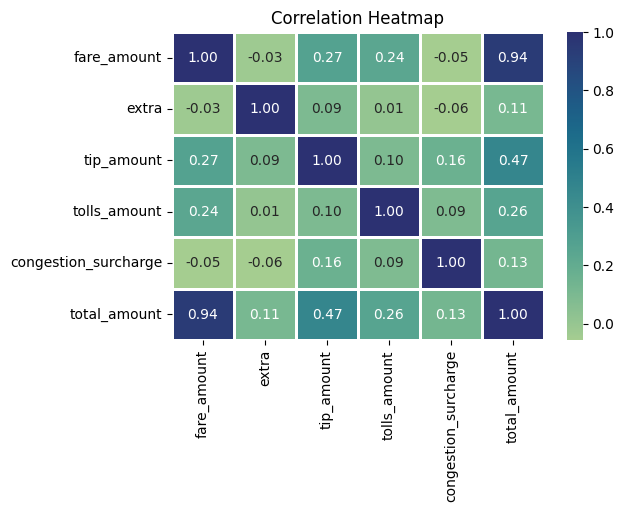

In [113]:
revenue = trips[['fare_amount','extra', 'tip_amount', 'tolls_amount', 'congestion_surcharge', 'total_amount']]
# We are taking off `mta_tax` and `improvement_surcharge` from this revenue data because those two values are constant for all trips

# Calculate the correlation matrix
corr = revenue.corr(method= 'spearman')

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='crest', fmt=".2f", linewidths=1.0)
plt.title('Correlation Heatmap')
plt.show()


From this heatmap, we can see that fare_amount is the only variable with a very high correlation to total_amount followed by tip_amount that have a not so strong correlation to the total_amount

In [114]:
rev = trips[['month_name','fare_amount','tip_amount']]

rev = rev.groupby(by='month_name', as_index=True).sum()
rev = rev.iloc[[1,0,2]]
rev

,fare_amount,tip_amount
month_name,,
January,1135531.28,145881.77
February,1080931.07,139531.62
March,1230630.78,155389.72


<Figure size 1200x300 with 0 Axes>

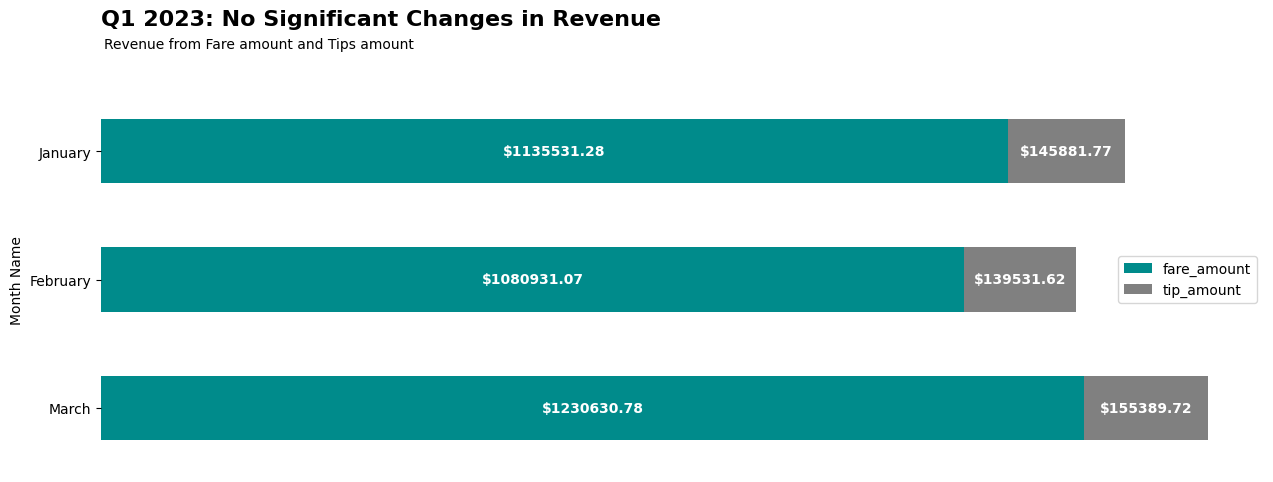

In [115]:
# get the data
source = rev.loc[['March', 'February', 'January']]

# set the figure
plt.figure(figsize=(12, 3))

# Create a stacked bar plot
ax = source.plot.barh(stacked=True, figsize=(15, 5), width=0.5, color=['darkcyan', 'grey'])

# Set the title and labels
plt.title("Q1 2023: No Significant Changes in Revenue", fontsize=16, fontweight='bold', y=1.15, loc='left', pad=3)
plt.suptitle("Revenue from Fare amount and Tips amount", fontsize=10, x=0.23, y=0.98)
plt.ylabel(ylabel="Month Name")
plt.xticks([])

# set annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'${round(width, 2)}', ha='center', va='center', 
            fontdict={'color': 'white', 'fontweight': 'bold'})

# set figure border
ax.set_frame_on(False)

# Show the plot
plt.show()

In [116]:
# Calculate the median fare amount
median_fare = trips['fare_amount'].median()
# Print the median fare amount with a dollar sign
print(f"The median fare amount in Q1 of 2023 was: ${median_fare:.2f}")

# Calculate the median tip amount
median_tip = trips['tip_amount'].median()
# Print the median tip amount with a dollar sign
print(f"The median tip amount in Q1 of 2023 was: ${median_tip:.2f}")


The median fare amount in Q1 of 2023 was: $13.50
The median tip amount in Q1 of 2023 was: $1.60


In [117]:
medfaretrip = trips.groupby(by='month_name')[['fare_amount','tip_amount']].median()
medfaretrip

,fare_amount,tip_amount
month_name,,
February,13.5,1.74
January,13.5,1.60
March,13.5,1.60


<div class="alert alert-block alert-success">
<b>Takeaway Message:</b><br>

The analysis of trips revenue in Q1 2023 indicates that :

1. Out of all the components that made up for the total amount, we can see that only `total_amount` have a high correlation followed by `tip_amount` with medium correlation strength. 
2. After analyzing the monthly revenue in the first quarter of 2023, we can see that the revenue fluctuates with no significant changes. In addition to that, `tip_amount` have been constant at around 13% of the `fare_amount`.
3. The median `fare_amount` and `tip_amount` that the customer had to pay was $13.50 and $1.60 respectively.

<a id="basic"></a>
### <b><span style='color:darkblue'> 2) Which part of the business can be improved to increase revenue? and how to do so?</span></b>

In [118]:
hailedcount = trips[trips['trip_type']==1]['total_amount'].count()
dispatchedcount = trips[trips['trip_type']==2]['total_amount'].count()

In [119]:
pcthailed = hailedcount/trips['total_amount'].count()*100
pcthailed = round(pcthailed, 1)
pctdispatched = dispatchedcount/trips['total_amount'].count()*100
pctdispatched = round(pctdispatched, 1)


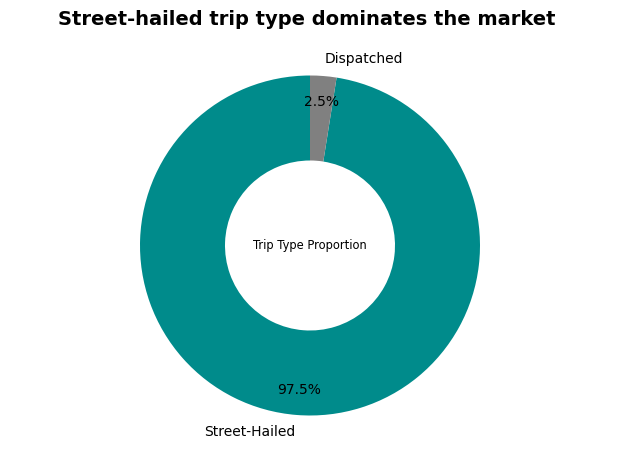

In [120]:
import matplotlib.pyplot as plt

sizes = [pcthailed,pctdispatched]
labels = ['Street-Hailed', 'Dispatched']
colors = ['darkcyan','grey']

fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('equal')

ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    wedgeprops=dict(width=0.5)
)

# set the title and labels
plt.title("Street-hailed trip type dominates the market", fontsize=14, fontweight='bold', x=0.08, y=1, loc='left')

plt.text(0, 0, 'Trip Type Proportion', va='center', ha='center', backgroundcolor='white', fontdict={'fontsize': 8.3})
plt.subplots_adjust(left=-0.3, right=0.9, top=0.95, bottom=0.1)
plt.show()

`Street-Hailed Trips`: These trips occur when a passenger hails a taxi directly from the street, typically in areas with high foot traffic like Manhattan. Street-hailed trips are spontaneous and rely on immediate availability and is most common in urban environments where taxis are frequently passing by.

`Dispatched Trips`: These trips are pre-arranged through a taxi dispatch system or a mobile app. Passengers book a taxi in advance, either specifying a pickup time or requesting the next available vehicle. Dispatched trips offer the convenience of scheduling and are often used in less densely populated areas or when passengers want to ensure a ride is available at a specific time. This method provides more predictability for both the driver and passenger.

In [121]:
trips.groupby(by='trip_type')[['total_amount']].agg(func='sum')

,total_amount
trip_type,
1,4595656.55
2,164761.37


In [122]:
tripno = trips.groupby(by='month_name')[['total_amount']].agg(func='count')

In [123]:
tripno

,total_amount
month_name,
February,64736
January,68167
March,71992


In [124]:
tripno = tripno.iloc[[1,0,2]]
tripno

,total_amount
month_name,
January,68167
February,64736
March,71992


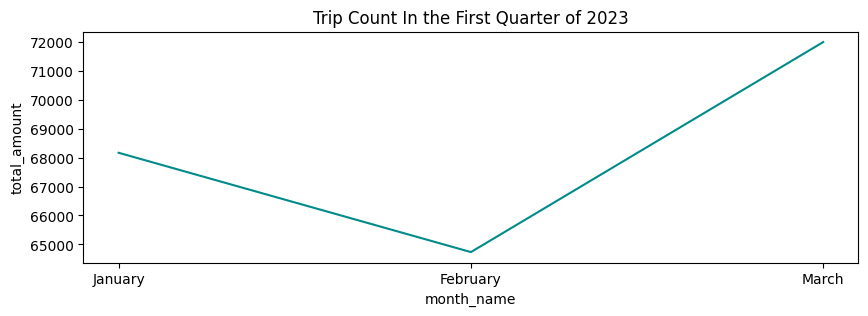

In [125]:
plt.figure(figsize=(10, 3))                                         # ukuran figure
sns.lineplot(data=tripno, x=tripno.index, y='total_amount', errorbar=None, color='darkcyan')    # line plot
plt.title('Trip Count In the First Quarter of 2023')
month_order = ['January', 'February', 'March']        # title                        # horizontal axis value
plt.xticks(month_order)
plt.show()

In [126]:
avgtrips = round(tripno['total_amount'].mean(),0)
avgtrips

68298.0

In [127]:
trips['total_amount'].sum()

4760417.92

In [128]:
trips['total_amount'].median()

19.2

<div class="alert alert-block alert-success">
<b>Takeaway Message:</b><br>

With the street-hailed trips dominating the market, this indicates that NYC TLC should not rely their revenue on dispatch trips as it only accounts for `2.5%` of the trips having total amount of `$164,761.37` in the first quarter as opposed to street-hailed trips having `$4,595,656.55` which is nearly `2,800%` more than that of street-hailed revenue:

1. Having that as our benchmark, we can then increase NYTC TLC green taxis revenue by optimizing its fleets according to the demand pattern of the customers during the first quarter of 2023
2. We can analyze demand pattern of passengers according to their Pick Up location (Boroughs and Zones) and also Pick Up time

When optimized correctly, the outcome of this should be:

1. An increase of 15% in trips amount from roughly 68,300 trips per month to 78,500 montly trips in the next quarter
2. This will lead to an increase of revenue for the NYC TLC company.

<a id="basic"></a>
### <b><span style='color:darkblue'> 3) Which areas have the highest demand and how does this impact revenue?</span></b>

In [129]:
trips.head(3)

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,PU_Borough,PU_Zone,DOLocationID,DO_Borough,DO_Zone,passenger_count,RatecodeID,...,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,payment_type,median_trip_distance,month_name,day_name,hour,time_group
0,2023-01-01 00:26:10,2023-01-01 00:37:11,166,Manhattan,Morningside Heights,143,Manhattan,Lincoln Square West,1,1,...,0.0,1.0,2.75,24.18,1,1.88,January,Sunday,0,Night
1,2023-01-01 00:51:03,2023-01-01 00:57:49,24,Manhattan,Bloomingdale,43,Manhattan,Central Park,1,1,...,0.0,1.0,2.75,18.59,1,1.71,January,Sunday,0,Night
2,2023-01-01 00:35:12,2023-01-01 00:41:32,223,Queens,Steinway,179,Queens,Old Astoria,1,1,...,0.0,1.0,0.00,11.64,1,1.48,January,Sunday,0,Night


In [130]:
topPU = trips.groupby(by=['PU_Borough','PU_Zone'])[['PULocationID']].agg(func='count').sort_values(by='PULocationID', ascending=False)
topPU.head(10)

PULocationID
PU_Borough PU_Zone                               
Manhattan  East Harlem North                38821
           East Harlem South                27932
           Central Harlem                   12498
           Morningside Heights              12459
Queens     Forest Hills                     11301
           Elmhurst                          8506
Manhattan  Central Park                      8308
Brooklyn   Fort Greene                       6424
Manhattan  Central Harlem North              5820
           Washington Heights South          5579

It is clear that the most popular borough for pickup location is in Manhattan, followed by Queens and Brooklyn next. 

In [131]:
topDO = trips.groupby(by=['DO_Borough','DO_Zone'])[['DOLocationID']].agg(func='count').sort_values(by='DOLocationID', ascending=False)
topDO.head(10)

DOLocationID
DO_Borough DO_Zone                            
Manhattan  East Harlem North             10430
           East Harlem South             10415
           Upper East Side North          8090
           Central Harlem                 8090
           Central Harlem North           7285
           Upper West Side North          6967
           Morningside Heights            6896
           Yorkville West                 4675
Queens     Forest Hills                   4606
Manhattan  Upper West Side South          4381

Similar to top pick up locations above, the top drop off location is also mostly dominated in Manhattan with some of the top pickup locations and drop off locations being the exact same places

### Look for Top Drop Off Location Coordinates

In [132]:
import folium
from branca.element import Figure

fig = Figure(width=500, height=550)
map = folium.Map(location=[40.776781, -73.957273], zoom_start=11.1)
fig.add_child(map)

Pickup_Location = [
    {'location': [40.806297, -73.936465], 'tooltip': 'Top 1 Pick Up Zone', 'popup': 'East Harlem North'},
    {'location': [40.791907, -73.944215], 'tooltip': 'Top 2 Pick Up Zone', 'popup': 'East Harlem South'},
    {'location': [40.811080, -73.946705], 'tooltip': 'Top 3 Pick Up Zone', 'popup': 'Central Harlem'},
    {'location': [40.81, -73.9625], 'tooltip': 'Top 4 Pick Up Zone', 'popup': 'Morningside Heights'},
    {'location': [40.719494, -73.845128], 'tooltip': 'Top 5 Pick Up Zone', 'popup': 'Forest Hills'},
    {'location': [40.740001, -73.877876], 'tooltip': 'Top 6 Pick Up Zone', 'popup': 'Elmhurst'},
    {'location': [40.776624, -73.963128], 'tooltip': 'Top 7 Pick Up Zone', 'popup': 'Central Park'},
    {'location': [40.689662, -73.973231], 'tooltip': 'Top 8 Pick Up Zone', 'popup': 'Fort Greene'},
    {'location': [40.820770, -73.939562], 'tooltip': 'Top 9 Pick Up Zone', 'popup': 'Central Harlem North'},
    {'location': [40.838720, -73.941213], 'tooltip': 'Top 10 Pick Up Zone', 'popup': 'Washington Heights South'}
]

Dropoff_Location = [
    {'location': [40.807, -73.937], 'tooltip': 'Top 1 Drop Off Zone', 'popup': 'East Harlem North'},
    {'location': [40.792, -73.945], 'tooltip': 'Top 2 Drop Off Zone', 'popup': 'East Harlem South'},
    {'location': [40.782143, -73.951753], 'tooltip': 'Top 3 Drop Off Zone', 'popup': 'Upper East Side North'},
    {'location': [40.812, -73.947], 'tooltip': 'Top 4 Drop Off Zone', 'popup': 'Central Harlem'},
    {'location': [40.821, -73.940], 'tooltip': 'Top 5 Drop Off Zone', 'popup': 'Central Harlem North'},
    {'location': [40.795281, -73.969913], 'tooltip': 'Top 6 Drop Off Zone', 'popup': 'Upper West Side North'},
    {'location': [40.811, -73.963], 'tooltip': 'Top 7 Drop Off Zone', 'popup': 'Morningside Heights'},
    {'location': [40.778855, -73.952423], 'tooltip': 'Top 8 Drop Off Zone', 'popup': 'Yorkville West'},
    {'location': [40.720, -73.846], 'tooltip': 'Top 9 Drop Off Zone', 'popup': 'Forest Hills'},
    {'location': [40.776825, -73.983818], 'tooltip': 'Top 10 Drop Off Zone', 'popup': 'Upper West Side South'}
]

def add_markers(marker_list, color):
    for locations in marker_list:
        folium.Marker(
            location=locations['location'],
            tooltip=locations['tooltip'],
            popup=locations['popup'],
            icon=folium.Icon(color=color, icon='info-sign')
        ).add_to(map)

add_markers(Pickup_Location, 'green')

add_markers(Dropoff_Location, 'blue')

map

### How does this impact NYC TLC revenue?

In [133]:
revs = trips.groupby('PU_Zone')[['total_amount']].agg(func='sum')
revs

,total_amount
PU_Zone,
Allerton/Pelham Gardens,839.42
Alphabet City,34.75
Astoria,110942.34
Astoria Park,49.58
Auburndale,1127.29
...,...
Woodlawn/Wakefield,1001.07
Woodside,91484.57
World Trade Center,198.05


In [134]:
toprevenue = topPU.copy()

In [135]:
toprevenue = toprevenue.reset_index().head(10)

In [136]:
toprevenue.rename(columns={'DOLocationID': 'No_of_Trips'}, inplace=True)
toprevenue

,PU_Borough,PU_Zone,PULocationID
0,Manhattan,East Harlem North,38821
1,Manhattan,East Harlem South,27932
2,Manhattan,Central Harlem,12498
3,Manhattan,Morningside Heights,12459
4,Queens,Forest Hills,11301
5,Queens,Elmhurst,8506
6,Manhattan,Central Park,8308
7,Brooklyn,Fort Greene,6424
8,Manhattan,Central Harlem North,5820
9,Manhattan,Washington Heights South,5579


In [137]:
toprevenue = pd.merge(left= toprevenue, right = revs, how='left', on='PU_Zone')
toprevenue

,PU_Borough,PU_Zone,PULocationID,total_amount
0,Manhattan,East Harlem North,38821,832701.33
1,Manhattan,East Harlem South,27932,616768.85
2,Manhattan,Central Harlem,12498,258106.59
3,Manhattan,Morningside Heights,12459,295976.31
4,Queens,Forest Hills,11301,221447.33
5,Queens,Elmhurst,8506,187667.12
6,Manhattan,Central Park,8308,193885.81
7,Brooklyn,Fort Greene,6424,141642.98
8,Manhattan,Central Harlem North,5820,122652.40
9,Manhattan,Washington Heights South,5579,184666.54


<Figure size 1500x1200 with 0 Axes>

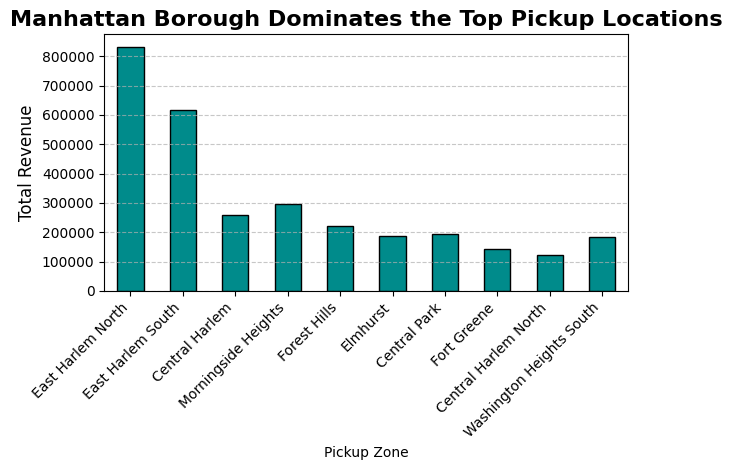

In [138]:
# Set the figure size
plt.figure(figsize=(15, 12))

# Plotting the bar chart
ax = toprevenue.plot(
    kind='bar', 
    x='PU_Zone', 
    y='total_amount', 
    color='darkcyan', 
    edgecolor='black',
    legend=False
)

# Setting the title and subtitles
plt.title('Manhattan Borough Dominates the Top Pickup Locations', fontsize=16, weight='bold')

# Set axis labels
plt.xlabel('Pickup Zone', fontsize=10)
plt.ylabel('Total Revenue', fontsize=12)

# Set x-ticks with rotation
plt.xticks(rotation=45, ha='right')

# Add gridlines to y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Takeaway Message:</b><br>

By focusing on the top borough and top zones will affect the revenue tremendously as Manhattan borough, more specifically, East Harlem North and East Harlem South have the highest number of trips and also the highest revenue. Thus, optimizing fleets allocation towards the top 10 pickup location will result in revenue increase

<a id="basic"></a>
### <b><span style='color:darkblue'> 4) What are the peak demand times for Green cabs, and how can vehicle allocation be adjusted accordingly?</span></b>

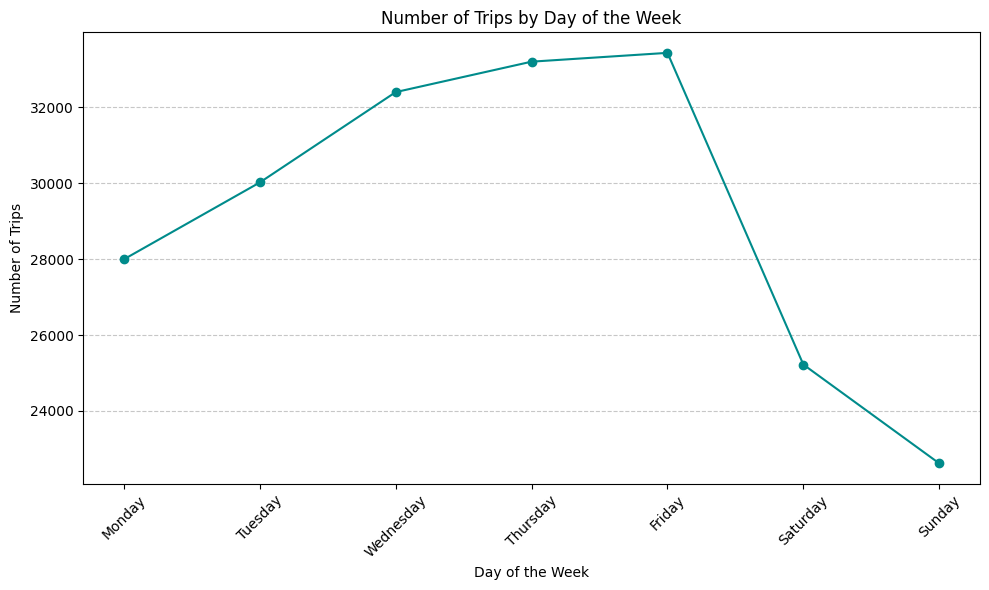

In [139]:
# Count the number of trips for each day
daily_trip_counts = trips.groupby('day_name').size()

# Order the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_trip_counts = daily_trip_counts.reindex(day_order, fill_value=0)

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(daily_trip_counts.index, daily_trip_counts.values, marker='o', linestyle='-', color='darkcyan')
plt.title('Number of Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

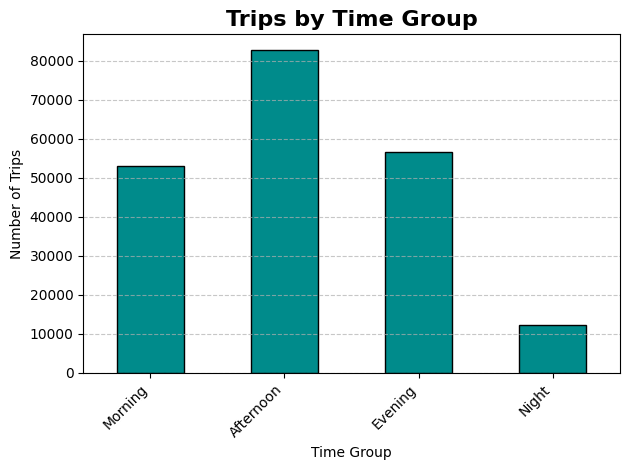

In [140]:
# Define the order for time groups
time_order = ['Morning', 'Afternoon', 'Evening', 'Night']

# Convert 'time_group' to a categorical type with the specified order
trips['time_group'] = pd.Categorical(trips['time_group'], categories=time_order, ordered=True)

# Group by 'time_group' and count the number of 'PULocationID'
time_group_counts = trips.groupby(by='time_group')[['PULocationID']].agg('count')

# Plot the bar chart
plt.figure(figsize=(8, 6))
time_group_counts.plot(kind='bar', legend=False, color='darkcyan', edgecolor='black')

# Set titles and labels
plt.title('Trips by Time Group', fontsize=16, weight='bold')
plt.xlabel('Time Group')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

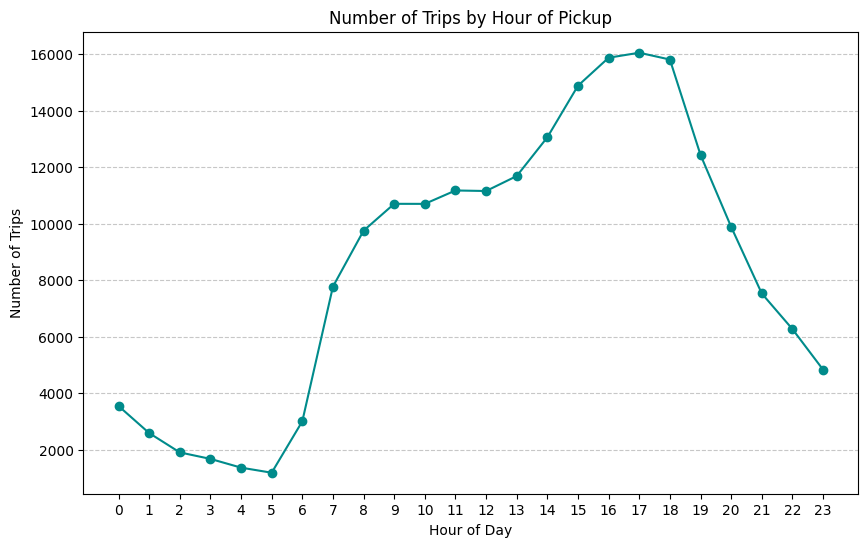

In [141]:
# Count the number of trips for each hour
hourly_trip_counts = trips.groupby('hour').size()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(hourly_trip_counts.index, hourly_trip_counts.values, marker='o', linestyle='-', color='darkcyan')
plt.title('Number of Trips by Hour of Pickup')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))  # Ensure all hours are shown
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<div class="alert alert-block alert-success">
<b>Takeaway Message:</b><br>

The analysis of Green cab trip data reveals key insights into peak demand periods that can significantly inform vehicle allocation strategies for NYC TLC:

1)Peak Demand Days: The highest number of trips occur on Wednesday, Thursday, and Friday. These mid-week days exhibit increased activity, likely due to a combination of commuters, business travelers, and mid-week social activities.

2)Peak Demand Times: Within these peak days, the Afternoon time group, particularly between 4 PM and 6 PM, shows the highest trip volume. This period aligns with the end of the workday when many individuals are commuting home, attending after-work events, or traveling for other engagements.

<a id="basic"></a>
### <b><span style='color:darkblue'> 5)Based on the demand pattern accross diferent times and places, which area should the NYC TLC focused on?</span></b>

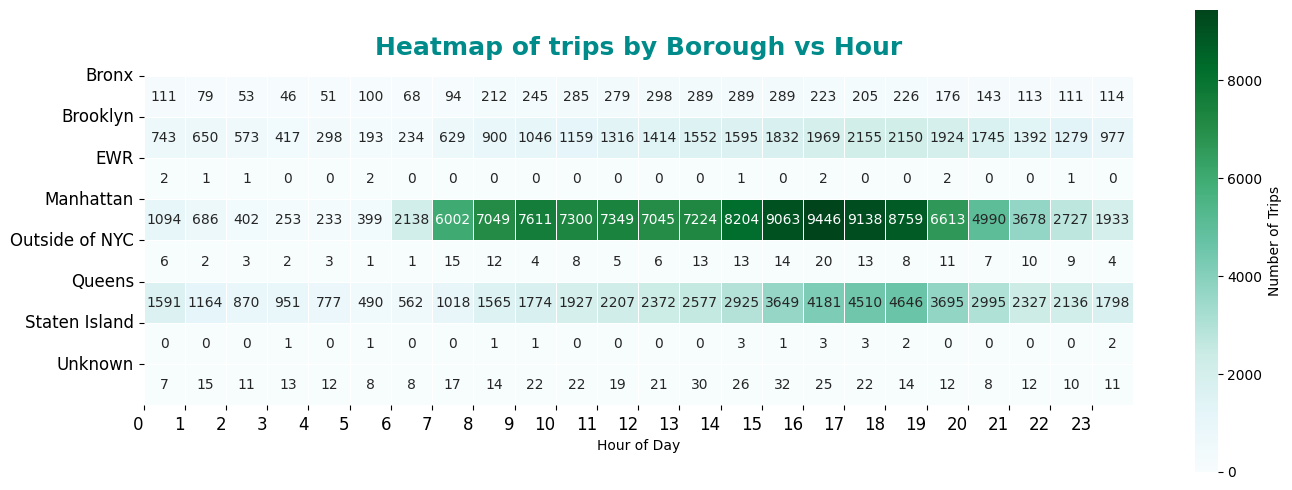

In [142]:
hourly_borough_trend = trips.groupby(['PU_Borough', 'hour']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(hourly_borough_trend, cmap='BuGn', linewidths=0.5, linecolor='white', annot=True, fmt='d', 
                      cbar_kws={'shrink': 0.6, 'label': 'Number of Trips'}, square=True, annot_kws={"size": 10})
plt.title('Heatmap of trips by Borough vs Hour', fontsize=18, weight='bold', color='darkcyan', pad=15)
plt.xlabel('Hour of Day')
plt.ylabel(None)
plt.xticks(range(24), range(24), fontsize=12,ha='right')
plt.yticks(range(len(hourly_borough_trend.index)), ['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Outside of NYC', 'Queens', 'Staten Island', 'Unknown'], fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

In [143]:
manhattan = trips[trips['PU_Borough']=='Manhattan']
topmanhattan = manhattan.groupby(['PU_Zone', 'hour']).size().unstack(fill_value=0)
# Calculate the total number of trips for each zone
topmanhattan['total_trips'] = topmanhattan.sum(axis=1)

# Sort by the total number of trips
topmanhattan_sorted = topmanhattan.sort_values(by='total_trips', ascending=False).head(10)
topmanhattan_sorted

hour,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,total_trips
PU_Zone,,,,,,,,,,,,,,,,,,,,,
East Harlem North,259,177,73,22,31,186,1554,3357,3276,3167,...,2358,2540,2400,2646,1741,1515,1163,824,537,38821
East Harlem South,239,153,98,33,27,60,203,739,960,1239,...,2467,2766,2901,2501,2021,1321,982,680,498,27932
Central Harlem,157,91,68,41,25,20,86,612,824,835,...,1022,908,704,683,518,446,337,316,264,12498
Morningside Heights,70,30,17,19,7,13,32,299,593,682,...,1128,1054,930,989,773,675,488,326,202,12459
Central Park,9,5,4,0,1,5,23,158,278,461,...,610,874,930,863,700,394,221,111,71,8308
Central Harlem North,98,78,51,47,33,16,65,276,318,381,...,435,378,306,284,231,172,166,160,139,5820
Washington Heights South,95,44,22,19,17,28,36,149,175,248,...,509,453,488,384,303,250,178,142,120,5579
Hamilton Heights,38,24,13,22,46,18,52,179,253,181,...,121,115,90,82,78,37,31,62,41,2285
Bloomingdale,15,9,2,4,4,3,8,40,112,94,...,128,91,114,84,84,57,45,38,17,1431


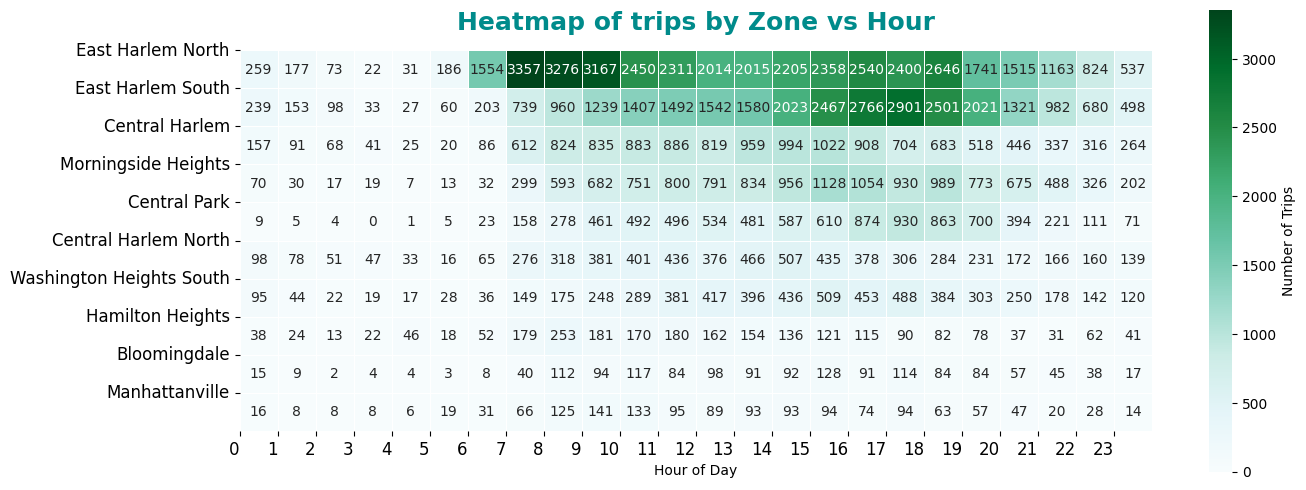

In [144]:
plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(topmanhattan_sorted.drop(columns='total_trips'), cmap='BuGn', linewidths=0.5, linecolor='white', annot=True, fmt='d', 
                      cbar_kws={'shrink': 0.6, 'label': 'Number of Trips'}, square=True, annot_kws={"size": 10})
plt.title('Heatmap of trips by Zone vs Hour', fontsize=18, weight='bold', color='darkcyan', pad=15)
plt.xlabel('Hour of Day')
plt.ylabel(None)
plt.xticks(range(24), range(24), fontsize=12,ha='right')
plt.yticks(range(len(topmanhattan_sorted.index)), topmanhattan_sorted.index, fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Takeaway Message:</b><br>

Our comprehensive analysis of Green cab trip demand patterns provides valuable insights that can inform strategic decisions regarding fleet allocation for NYC TLC:

1) Top Borough and Zone: 
    - The data indicates that the Manhattan borough is a focal point of activity, consistently showing a high volume of trips throughout the day. This is particularly pronounced between 8 AM and 8 PM, capturing both the morning and evening rush hours as well as midday activities. 
    - Within Manhattan, East Harlem stands out as the leading zone for pickups. This zone’s prominence can be attributed to its dense population, vibrant community activities, and strategic location that connects residents to major employment centers, educational institutions, and cultural hubs. As a result, East Harlem serves as a critical node for passenger pickups, contributing significantly to the borough's overall demand profile.

2) Peak Demand Times: 
    - The peak period for trips is identified between 4 PM and 7 PM, coinciding with the evening commute and various end-of-day activities. This time frame is characterized by a surge in demand as residents return home from work, attend social events, and engage in leisure activities. 
    - The increased demand during these hours can also be linked to tourists and city visitors who explore Manhattan's attractions and require transportation for dining and entertainment. The pattern underscores the importance of aligning fleet resources with these temporal spikes in demand to optimize service delivery.

<a id="numerical"></a>
# <b><span style='color:darkgreen'>Section 5 |</span><span style='color:darkblue'> Conclusion & Recommendation</span></b>

____

<div class="alert alert-block alert-success">
<b>Conclusion:</b><br>

The analysis of NYC TLC's Green cab trip data reveals significant opportunities for improving operational efficiency and enhancing customer satisfaction. By strategically optimizing fleet allocation and addressing key areas of demand, NYC TLC can achieve the following benefits:

1) Increased Revenue:
    By successfully increasing the monthly trip volume by 15%, NYC TLC can anticipate a revenue growth of 15%-20% in the next quarter. This increase is primarily driven by optimizing vehicle allocation to minimize the occurrence of deadheading, where taxis operate without passengers between trips. Reducing these empty runs will not only increase the number of completed fares but also enhance the overall efficiency of the fleet.

2) Reduced Passenger Wait Times:
    A more strategically allocated fleet will lead to shorter wait times for passengers seeking taxis, particularly in high-demand areas such as Manhattan. This reduction in wait time is expected to enhance customer satisfaction, as passengers experience more reliable and timely service.

3) Enhanced Customer Satisfaction and Increased Tips:
    Improved service reliability and reduced wait times contribute to higher levels of customer satisfaction. Satisfied customers are more likely to reward drivers with higher tips, potentially increasing the tip_amount, which currently averages around 12.9% of the fare. A focus on maintaining and improving service quality could foster a positive feedback loop, where satisfied customers continue to use and recommend the service, further boosting revenue.

<div class="alert alert-block alert-success">
<b>Summary Calculation of Estimated Revenue Increase:</b><br>

Current State
Average Monthly Trips: Approximately 68,298 trips.
Median Total Amount per Trip: $19.20.

Projected Increase
Projected Monthly Trips: An increase of 15% in trip volume is anticipated, increasing from roughly 68,300 to 78,500 trips per month.

Revenue Calculation
Current Monthly Revenue:
Calculation: 
68,298 trips/month × $19.20/trip
Result: 
$1,311,321.60 per month.

Projected Monthly Revenue (with 15% increase in trips):
Calculation: 
78,500 trips/month × $19.20/trip
Result: 
$1,507,200.00 per month.

Estimated Revenue Increase:
Calculation: 
Projected Revenue − Current Revenue
Result: 
$1,507,200.00 − $1,311,321.60 = $195,878.40

Percentage Increase in Revenue
Calculation: 
($195,878.40/$1,311,321.60) × 100 ≈14.93%

Conclusion
Based on the projected increase in trip volume, NYC TLC can expect an estimated revenue increase of approximately 14.93%, translating to an additional $195,878.40 in revenue per month. By optimizing fleet allocation and aligning resources with demand patterns, NYC TLC can capitalize on these growth opportunities, enhancing service efficiency and profitability.

<div class="alert alert-block alert-success">
<b>Recommendation:</b><br>

To capitalize on these opportunities and drive revenue growth, NYC TLC should consider the following strategic recommendations:

1) Optimize Fleet Allocation in Manhattan:
    Given the high volume of trips originating in Manhattan, especially in zones such as East Harlem, NYC TLC should focus on deploying a significant portion of its fleet in this borough. By aligning vehicle availability with peak demand times, particularly between 4 PM and 7 PM, NYC TLC can ensure efficient service delivery and reduce the likelihood of unmet demand.

2) Implement Dynamic Scheduling and Incentives:
    Adjust driver schedules to align with peak demand periods, ensuring adequate coverage during busy hours. Consider implementing incentive programs for drivers who operate during peak times or in high-demand zones, encouraging them to maximize their availability when and where it is most needed.

3) Utilize Real-Time Data for Fleet Management:
    Leverage real-time data analytics to monitor demand patterns and dynamically adjust vehicle allocation. This approach allows NYC TLC to respond swiftly to changing demand conditions, optimizing fleet distribution across different areas and times of day.

4) Enhance Passenger Experience:
    Focus on improving passenger experience through better communication, reliable service, and efficient pick-up and drop-off processes. Consider developing targeted marketing campaigns that highlight the benefits of using NYC TLC services, emphasizing reduced wait times and enhanced reliability.

5) Promote Driver Training and Engagement:
    Invest in driver training programs that emphasize customer service, safety, and efficiency. Engaged and well-trained drivers are more likely to provide superior service, contributing to overall customer satisfaction and increased tip amounts.
    
By implementing these recommendations, NYC TLC can effectively leverage data-driven insights to enhance service quality, increase operational efficiency, and drive revenue growth. Aligning fleet allocation with demand patterns will ensure that NYC TLC remains competitive and continues to meet the evolving needs of its customers.

<div class="alert alert-block alert-success">
<b>Implementation Plan:</b><br>

To effectively execute the recommendations for optimizing fleet allocation, NYC TLC will follow a structured timeline that outlines the actions and outcomes

Detailed Plan

Phase 1: Data Collection and Integration (Month 1)

- Action: Upgrade data collection systems and integrate real-time GPS tracking for dynamic analysis.
- Outcome: Establish a robust data infrastructure to support decision-making and fleet management.

Phase 2: Fleet Optimization and Scheduling (Month 2-3)

- Action: Concentrate fleet resources in Manhattan, especially in high-demand zones like East Harlem, and adjust driver schedules to cover peak hours with incentives.
- Outcome: Enhanced service efficiency and reduced passenger wait times, leading to increased customer satisfaction.

Phase 3: Marketing and Performance Monitoring (Month 3-4)

- Action: Launch targeted marketing campaigns to promote improved service, and establish KPIs for ongoing performance monitoring and evaluation.
- Outcome: Increased brand awareness, customer engagement, and a data-driven approach to continuous improvement.

<div class="alert alert-block alert-success">
<b>Future Analysis:</b><br>

Recommended Areas for Future Analysis

1) Demand Prediction Modeling:
- Opportunity: Develop predictive models to forecast demand based on historical data, weather patterns, and event schedules.
- Gap: Current analysis primarily focuses on historical trends without predictive forecasting.
- Data Needed: Detailed weather data, city event calendars, and economic indicators.

2) Competitor Analysis:
- Opportunity: Analyze competitor presence and activity in key zones to understand market dynamics and identify opportunities for differentiation.
- Gap: Limited insights into competitor strategies and their impact on demand.
- Data Needed: Market share data, competitor pricing, and service offerings.

3) Passenger Segmentation:
- Opportunity: Conduct segmentation analysis to understand different passenger demographics and tailor services to specific needs.
- Gap: Current analysis does not differentiate between passenger types or preferences.
- Data Needed: Passenger demographics, trip purpose data, and feedback surveys.